<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [4]:
filename = f'/content/drive/My Drive/training_variants'
data = pd.read_csv(filename)
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [5]:
# note the seprator in this file
filename = f'/content/drive/My Drive/training_text'
data_text =pd.read_csv(filename,sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

<h3>3.1.3. Preprocessing of text</h3>

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [8]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 27.956666000000002 seconds


In [9]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene  ... Class                                               TEXT
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [10]:
#replacing null values in TEXT with values
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [0]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [12]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [0]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_') 
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [14]:
train_df.head()

ID    Gene  ... Class                                               TEXT
908    908  PDGFRA  ...     7  purpose platelet derived growth factor recepto...
1765  1765    IDH1  ...     5  cancer genome characterization efforts provide...
648    648  CDKN2A  ...     4  p16 gene located chromosome 9p21 region linked...
1112  1112   FANCA  ...     4  abstract fanconi anemia fa genomic instability...
1762  1762    IDH1  ...     5  introduction somatic mutations human cytosolic...

[5 rows x 5 columns]

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [15]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

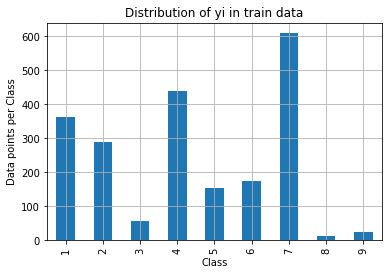

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


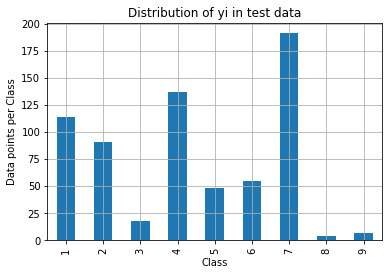

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


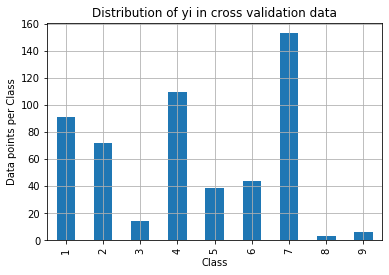

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [16]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4987841334186878
Log loss on Test Data using Random Model 2.460502298216021
-------------------- Confusion matrix --------------------


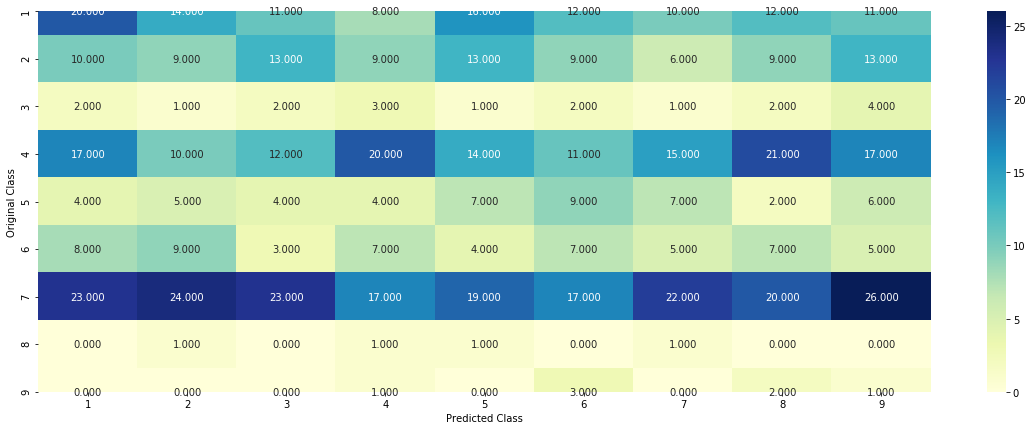

-------------------- Precision matrix (Columm Sum=1) --------------------


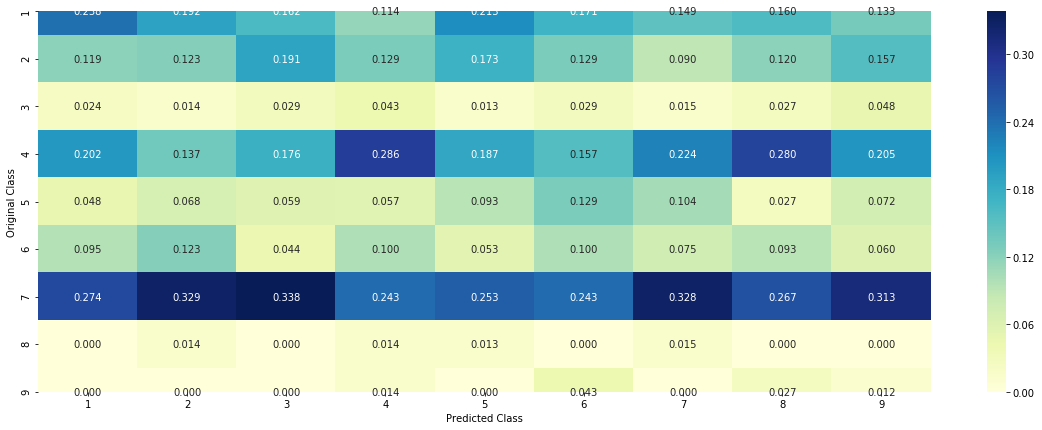

-------------------- Recall matrix (Row sum=1) --------------------


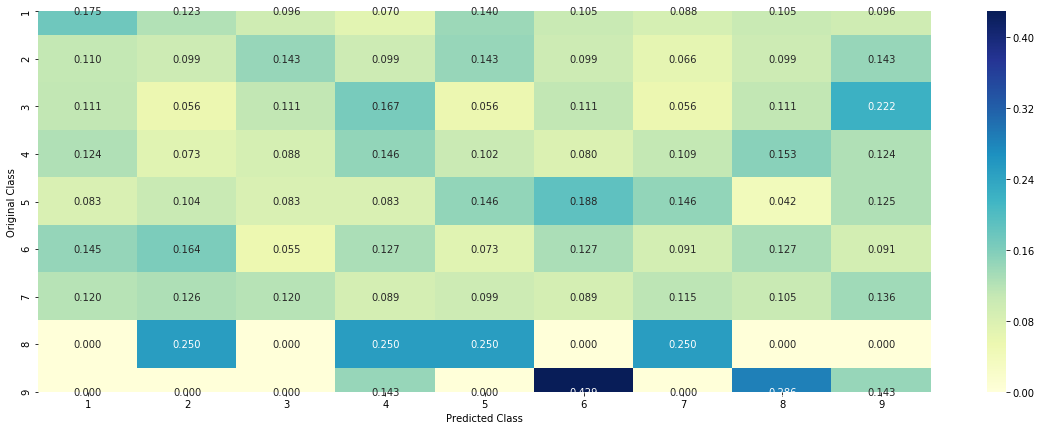

In [18]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [0]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [32]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 233
BRCA1    179
TP53     111
EGFR      92
BRCA2     87
PTEN      70
BRAF      67
KIT       58
ERBB2     44
ALK       44
FLT3      37
Name: Gene, dtype: int64


In [33]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 233 different categories of genes in the train data, and they are distibuted as follows


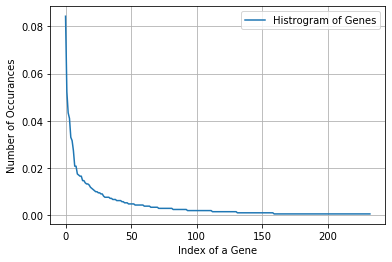

In [34]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


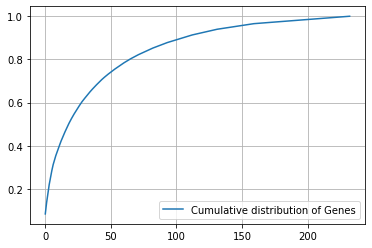

In [35]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [0]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [37]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [0]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [28]:
train_df['Gene'].head()

3276      RET
1678     FLT3
2429    BRCA1
1058    EWSR1
444      TP53
Name: Gene, dtype: object

In [29]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid2',
 'arid5b',
 'asxl1',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'elf3',
 'ep300',
 'epas1',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fancc',
 'fbxw7',
 'fgf19',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'gata3',
 'gli1',
 'gnaq',
 'gnas',
 'h3f3a',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf1r',
 '

In [30]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 234)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2184797129448177
For values of alpha =  0.0001 The log loss is: 1.1950209398375853
For values of alpha =  0.001 The log loss is: 1.2273624706814665
For values of alpha =  0.01 The log loss is: 1.33794282529016
For values of alpha =  0.1 The log loss is: 1.4226684259122742
For values of alpha =  1 The log loss is: 1.460440561403661


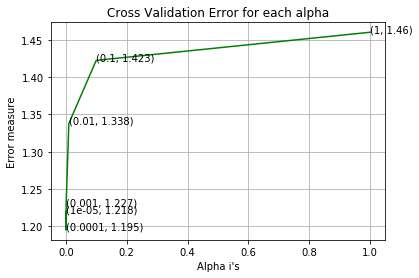

For values of best alpha =  0.0001 The train log loss is: 1.0038806064086379
For values of best alpha =  0.0001 The cross validation log loss is: 1.1950209398375853
For values of best alpha =  0.0001 The test log loss is: 1.1772679867939155


In [31]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [32]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  234  genes in train dataset?
Ans
1. In test data 643 out of 665 : 96.69172932330827
2. In cross validation data 515 out of  532 : 96.80451127819549


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [39]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1925
Truncating_Mutations    61
Amplification           48
Deletion                43
Fusions                 28
Overexpression           4
E17K                     3
G12D                     2
M1R                      2
T73I                     2
A146T                    2
Name: Variation, dtype: int64


In [40]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1925 different categories of variations in the train data, and they are distibuted as follows


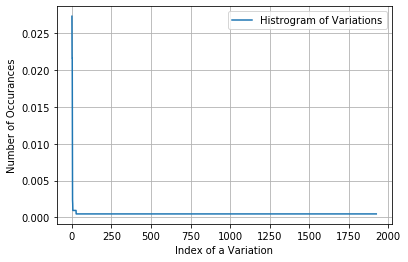

In [35]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02730697 0.04896422 0.07062147 ... 0.99905838 0.99952919 1.        ]


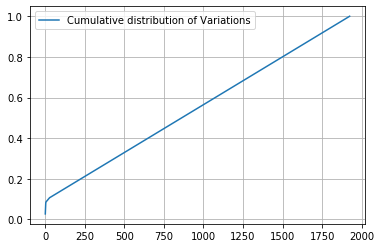

In [36]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [0]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [38]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [0]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [40]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1954)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.708724315815738
For values of alpha =  0.0001 The log loss is: 1.7057858780069979
For values of alpha =  0.001 The log loss is: 1.7113180745568273
For values of alpha =  0.01 The log loss is: 1.7190464288038507
For values of alpha =  0.1 The log loss is: 1.725279693579195
For values of alpha =  1 The log loss is: 1.725757177598211


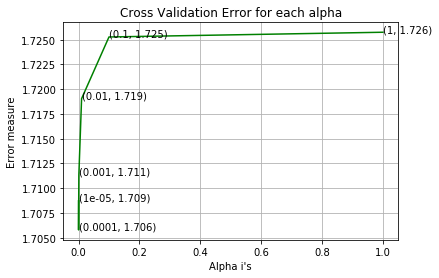

For values of best alpha =  0.0001 The train log loss is: 0.7482918932864786
For values of best alpha =  0.0001 The cross validation log loss is: 1.7057858780069979
For values of best alpha =  0.0001 The test log loss is: 1.7164645473034883


In [41]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [42]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1925  genes in test and cross validation data sets?
Ans
1. In test data 61 out of 665 : 9.172932330827068
2. In cross validation data 60 out of  532 : 11.278195488721805


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [0]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

#returns a dict with #times a word has occured

In [0]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [44]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 53113


In [0]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [0]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df) 
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [0]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [0]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature 
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [0]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [51]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5412, 4: 3857, 5: 2956, 6: 2914, 7: 2319, 8: 2214, 10: 1658, 9: 1462, 12: 1409, 13: 1153, 14: 988, 11: 954, 15: 860, 16: 786, 20: 638, 18: 594, 17: 560, 19: 510, 24: 506, 21: 499, 25: 496, 22: 436, 42: 418, 28: 409, 26: 402, 27: 364, 23: 353, 30: 347, 33: 285, 29: 283, 34: 265, 31: 265, 32: 258, 36: 245, 57: 239, 40: 232, 35: 232, 39: 229, 38: 199, 44: 196, 37: 189, 45: 179, 54: 178, 48: 172, 41: 169, 47: 163, 50: 157, 53: 156, 43: 155, 46: 152, 65: 143, 60: 141, 51: 141, 52: 140, 49: 137, 56: 132, 58: 129, 55: 127, 63: 121, 61: 119, 78: 112, 66: 110, 70: 108, 59: 106, 64: 99, 62: 97, 68: 96, 71: 95, 67: 94, 75: 91, 73: 87, 72: 87, 80: 84, 84: 82, 69: 82, 77: 80, 76: 79, 86: 77, 83: 75, 74: 75, 98: 70, 90: 70, 89: 70, 104: 69, 96: 67, 82: 67, 92: 66, 79: 66, 114: 65, 81: 64, 101: 63, 88: 63, 91: 62, 94: 60, 100: 58, 85: 58, 121: 56, 117: 56, 87: 55, 120: 54, 112: 54, 106: 52, 95: 52, 93: 52, 97: 51, 102: 50, 132: 49, 110: 47, 108: 46, 141: 45, 133: 45, 125: 45, 105: 45, 142

For values of alpha =  1e-05 The log loss is: 1.3381709723157829
For values of alpha =  0.0001 The log loss is: 1.2300923256186993
For values of alpha =  0.001 The log loss is: 1.2262787787652496
For values of alpha =  0.01 The log loss is: 1.35457859134718
For values of alpha =  0.1 The log loss is: 1.5264217161938758
For values of alpha =  1 The log loss is: 1.7313062862569437


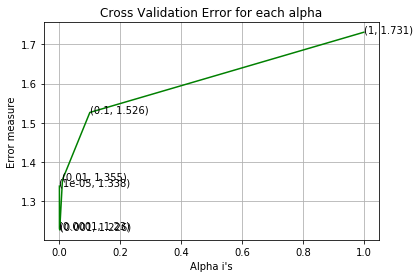

For values of best alpha =  0.001 The train log loss is: 0.6992862531891861
For values of best alpha =  0.001 The cross validation log loss is: 1.2262787787652496
For values of best alpha =  0.001 The test log loss is: 1.1366916311427426


In [52]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [0]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features)) #returns len of (common words in both train dataset and df dataset)
    return len1,len2

In [54]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.957 % of word of test data appeared in train data
97.367 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [0]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [0]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [0]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [0]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [59]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 56251)
(number of data points * number of features) in test data =  (665, 56251)
(number of data points * number of features) in cross validation data = (532, 56251)


In [60]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

In [0]:
from prettytable import PrettyTable

x= PrettyTable()
x.field_names = ['model', 'train loss','cv loss', 'test loss', '%misclassification']


for alpha = 1e-05
Log Loss : 1.297861044360364
for alpha = 0.0001
Log Loss : 1.3015574265499295
for alpha = 0.001
Log Loss : 1.300260974385128
for alpha = 0.1
Log Loss : 1.3050572417961455
for alpha = 1
Log Loss : 1.3465080773561824
for alpha = 10
Log Loss : 1.4588638582570175
for alpha = 100
Log Loss : 1.4610240699528596
for alpha = 1000
Log Loss : 1.3954342524148395


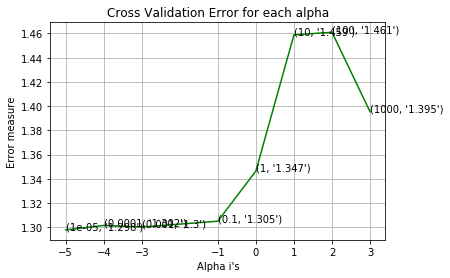

For values of best alpha =  1e-05 The train log loss is: 0.8216537206622779
For values of best alpha =  1e-05 The cross validation log loss is: 1.297861044360364
For values of best alpha =  1e-05 The test log loss is: 1.2654684042295736


In [62]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.297861044360364
Number of missclassified point : 0.4116541353383459
-------------------- Confusion matrix --------------------


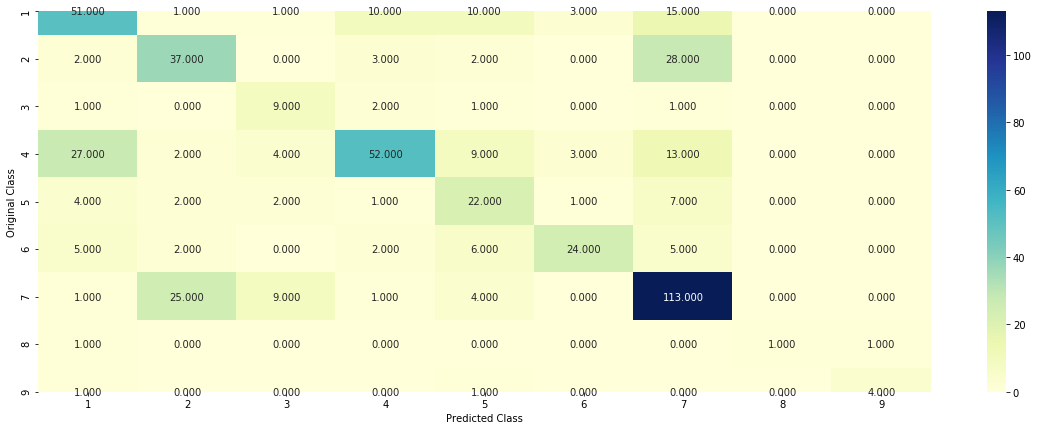

-------------------- Precision matrix (Columm Sum=1) --------------------


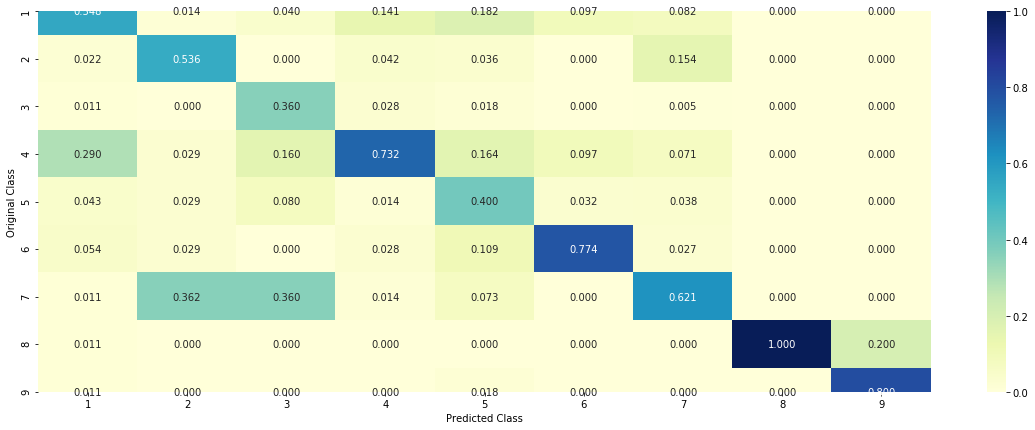

-------------------- Recall matrix (Row sum=1) --------------------


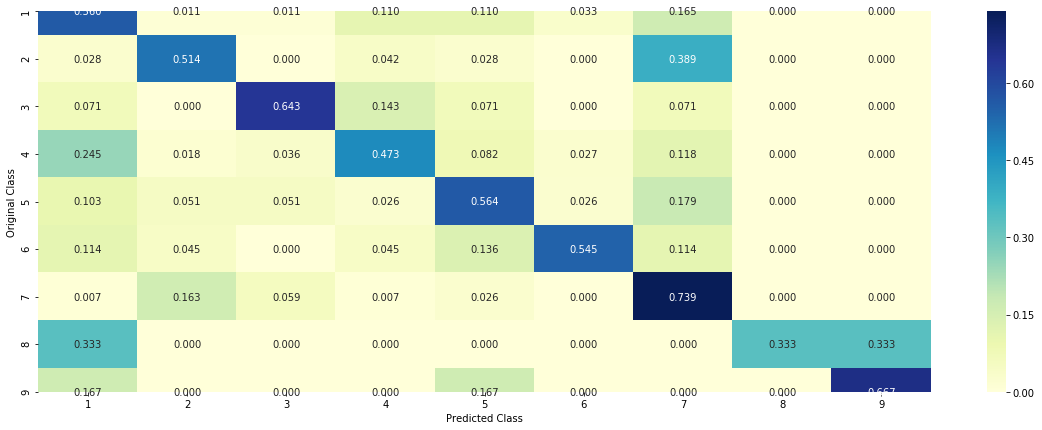

In [63]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

In [0]:
x.add_row(['Naive Bayes',0.822,1.298,1.265,41.16])

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [66]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5915 0.0973 0.0118 0.1131 0.0363 0.0351 0.1058 0.0054 0.0037]]
Actual Class : 4
--------------------------------------------------
12 Text feature [protein] present in test data point [True]
13 Text feature [type] present in test data point [True]
14 Text feature [function] present in test data point [True]
15 Text feature [affect] present in test data point [True]
16 Text feature [one] present in test data point [True]
17 Text feature [wild] present in test data point [True]
18 Text feature [two] present in test data point [True]
19 Text feature [dna] present in test data point [True]
20 Text feature [binding] present in test data point [True]
21 Text feature [containing] present in test data point [True]
23 Text feature [possible] present in test data point [True]
25 Text feature [specific] present in test data point [True]
26 Text feature [reduced] present in test data point [True]
28 Text feature [region] present in test data p

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [67]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0936 0.096  0.0117 0.1104 0.0358 0.035  0.6086 0.0053 0.0036]]
Actual Class : 7
--------------------------------------------------
17 Text feature [downstream] present in test data point [True]
18 Text feature [kinase] present in test data point [True]
19 Text feature [presence] present in test data point [True]
21 Text feature [well] present in test data point [True]
22 Text feature [contrast] present in test data point [True]
23 Text feature [recently] present in test data point [True]
24 Text feature [cell] present in test data point [True]
26 Text feature [expressing] present in test data point [True]
27 Text feature [activation] present in test data point [True]
28 Text feature [cells] present in test data point [True]
29 Text feature [inhibitor] present in test data point [True]
31 Text feature [growth] present in test data point [True]
32 Text feature [independent] present in test data point [True]
34 Text feature [shown] pr

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.12289353870431
for alpha = 11
Log Loss : 1.0798571566988657
for alpha = 15
Log Loss : 1.1003224910068048
for alpha = 21
Log Loss : 1.1096165957160407
for alpha = 31
Log Loss : 1.1042290084327435
for alpha = 41
Log Loss : 1.1074257454989067
for alpha = 51
Log Loss : 1.1080758546039895
for alpha = 99
Log Loss : 1.1094471836134359


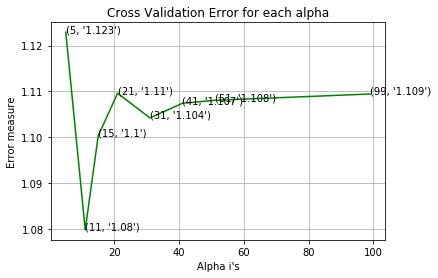

For values of best alpha =  11 The train log loss is: 0.6275539754715628
For values of best alpha =  11 The cross validation log loss is: 1.0798571566988657
For values of best alpha =  11 The test log loss is: 1.0541754154717111


In [68]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

In [0]:
x.add_row(['K-NN',0.628,1.08,1.054,38.53])

Log loss : 1.0798571566988657
Number of mis-classified points : 0.38533834586466165
-------------------- Confusion matrix --------------------


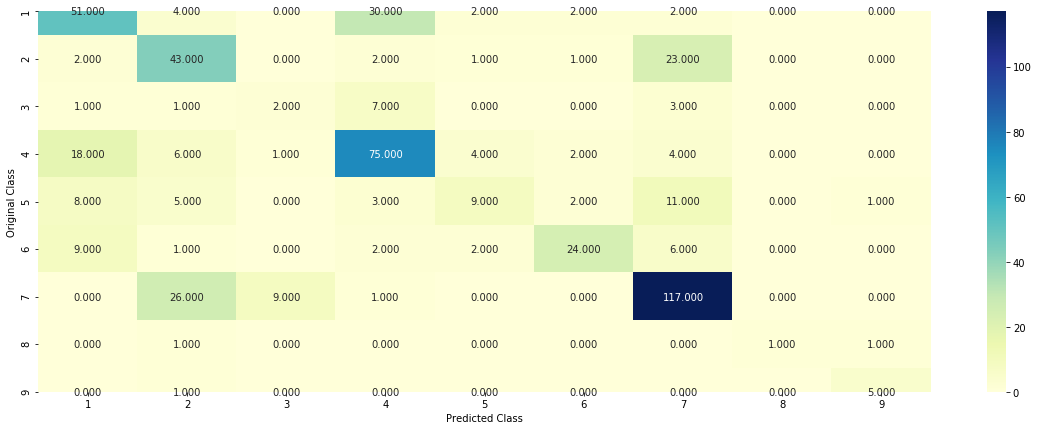

-------------------- Precision matrix (Columm Sum=1) --------------------


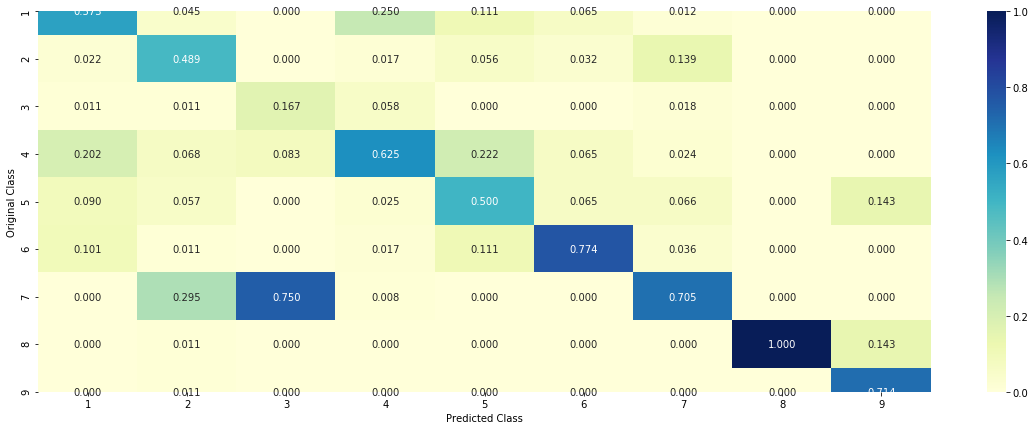

-------------------- Recall matrix (Row sum=1) --------------------


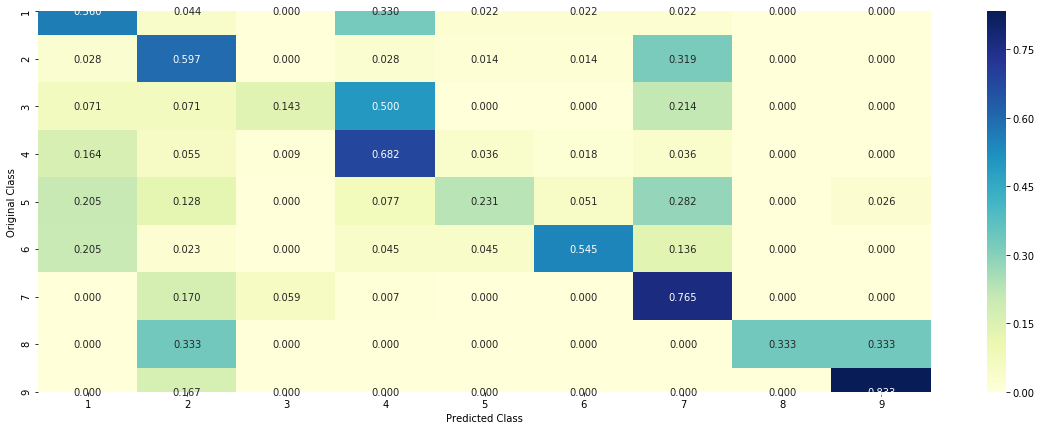

In [69]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [72]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 4
The  11  nearest neighbours of the test points belongs to classes [4 4 5 4 4 1 4 1 4 4 4]
Fequency of nearest points : Counter({4: 8, 1: 2, 5: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [73]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [2 7 7 7 7 2 7 7 7 7 7]
Fequency of nearest points : Counter({7: 9, 2: 2})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3834061270474793
for alpha = 1e-05
Log Loss : 1.3889460297352956
for alpha = 0.0001
Log Loss : 1.1934350096341142
for alpha = 0.001
Log Loss : 1.1627670102246082
for alpha = 0.01
Log Loss : 1.2020320599504284
for alpha = 0.1
Log Loss : 1.5132189019060387
for alpha = 1
Log Loss : 1.7108139219409473
for alpha = 10
Log Loss : 1.7355913454559002
for alpha = 100
Log Loss : 1.7382252971629542


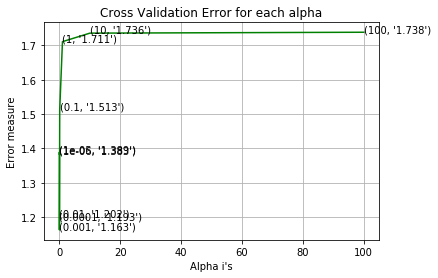

For values of best alpha =  0.001 The train log loss is: 0.5588542100180063
For values of best alpha =  0.001 The cross validation log loss is: 1.1627670102246082
For values of best alpha =  0.001 The test log loss is: 1.0714482697095162


In [74]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

In [0]:
x.add_row(['Logistic Regression with class balance',0.559,1.163,1.071,36.28])

Log loss : 1.1627670102246082
Number of mis-classified points : 0.36278195488721804
-------------------- Confusion matrix --------------------


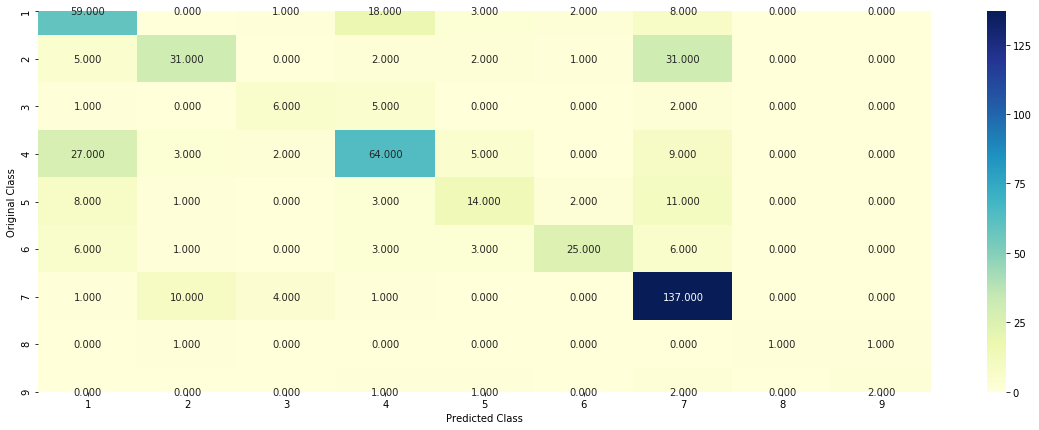

-------------------- Precision matrix (Columm Sum=1) --------------------


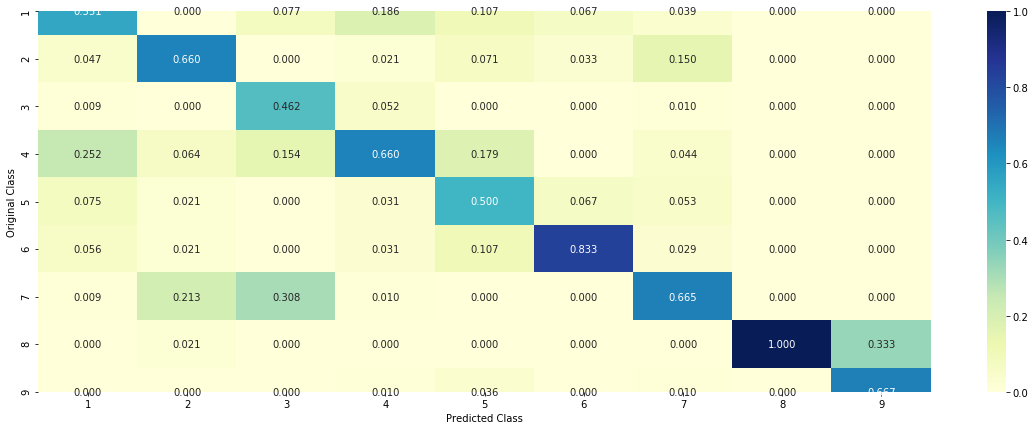

-------------------- Recall matrix (Row sum=1) --------------------


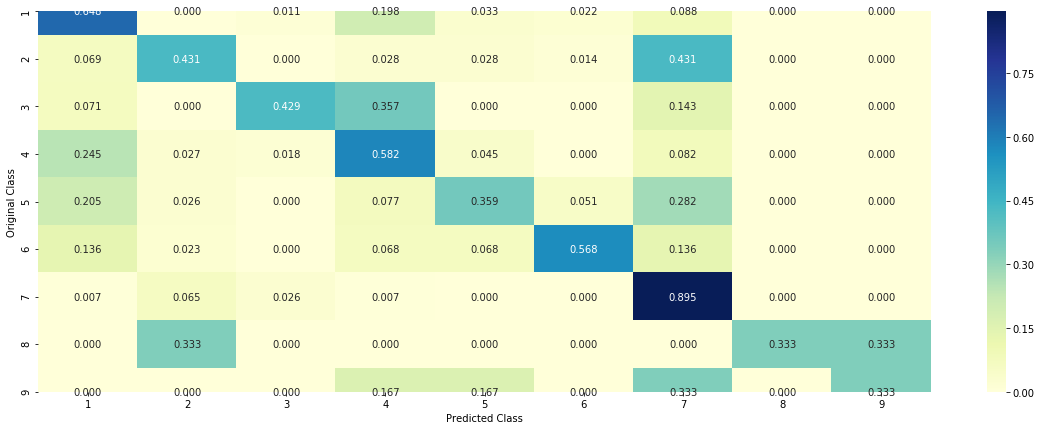

In [75]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf) 

<h4>4.3.1.3. Feature Importance</h4>

In [0]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [78]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.3349 0.024  0.0011 0.5741 0.0118 0.0033 0.0364 0.0085 0.006 ]]
Actual Class : 4
--------------------------------------------------
121 Text feature [suppressor] present in test data point [True]
246 Text feature [pet28a] present in test data point [True]
260 Text feature [10a] present in test data point [True]
303 Text feature [stability] present in test data point [True]
304 Text feature [precipitate] present in test data point [True]
338 Text feature [c242s] present in test data point [True]
482 Text feature [mislocalization] present in test data point [True]
496 Text feature [inactivation] present in test data point [True]
Out of the top  500  features  8 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [79]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0515 0.1491 0.0062 0.0718 0.015  0.0114 0.6832 0.0058 0.006 ]]
Actual Class : 7
--------------------------------------------------
32 Text feature [constitutive] present in test data point [True]
33 Text feature [downstream] present in test data point [True]
59 Text feature [activated] present in test data point [True]
78 Text feature [mitogen] present in test data point [True]
103 Text feature [expressing] present in test data point [True]
107 Text feature [activation] present in test data point [True]
109 Text feature [transformed] present in test data point [True]
117 Text feature [extracellular] present in test data point [True]
144 Text feature [ba] present in test data point [True]
151 Text feature [f3] present in test data point [True]
174 Text feature [serum] present in test data point [True]
181 Text feature [refractory] present in test data point [True]
184 Text feature [phospho] present in test data point [True]
390 Text

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.362192916307009
for alpha = 1e-05
Log Loss : 1.351445237669945
for alpha = 0.0001
Log Loss : 1.2148851653659667
for alpha = 0.001
Log Loss : 1.1848778475306574
for alpha = 0.01
Log Loss : 1.2877835766445236
for alpha = 0.1
Log Loss : 1.4324806324986645
for alpha = 1
Log Loss : 1.6879004766388088


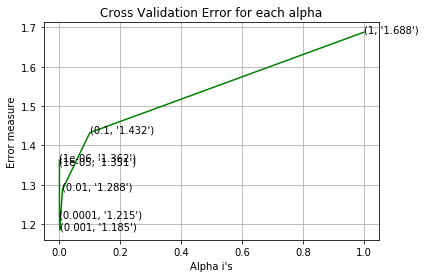

For values of best alpha =  0.001 The train log loss is: 0.5618640977414208
For values of best alpha =  0.001 The cross validation log loss is: 1.1848778475306574
For values of best alpha =  0.001 The test log loss is: 1.0867079434604323


In [80]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

In [0]:
x.add_row(['Logistic Regression w/o class balance',0.562,1.185,1.088,34.96])

Log loss : 1.1848778475306574
Number of mis-classified points : 0.34962406015037595
-------------------- Confusion matrix --------------------


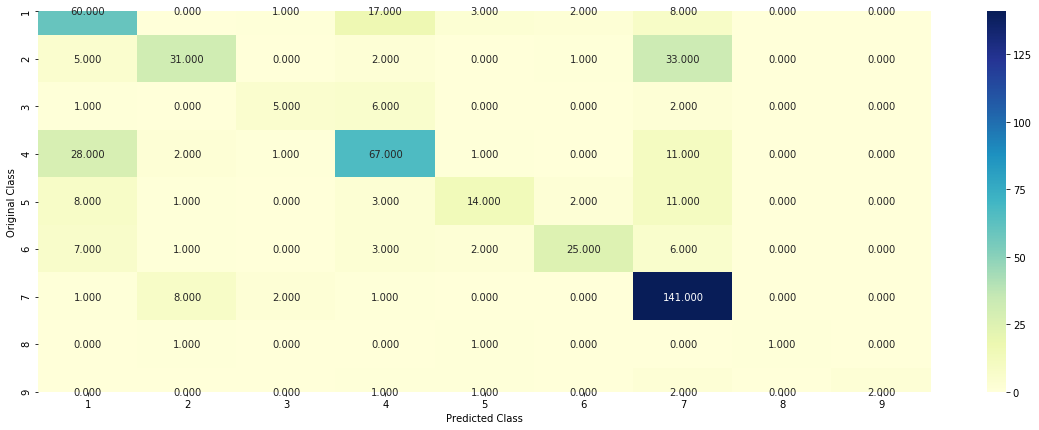

-------------------- Precision matrix (Columm Sum=1) --------------------


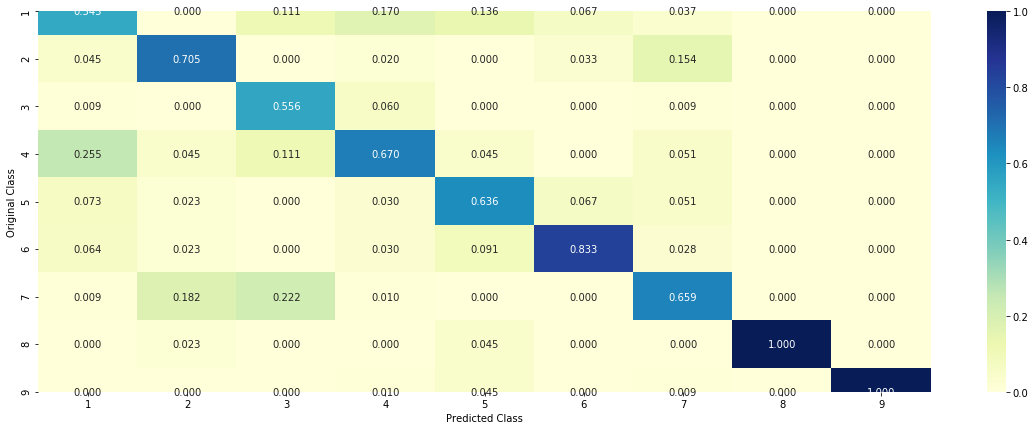

-------------------- Recall matrix (Row sum=1) --------------------


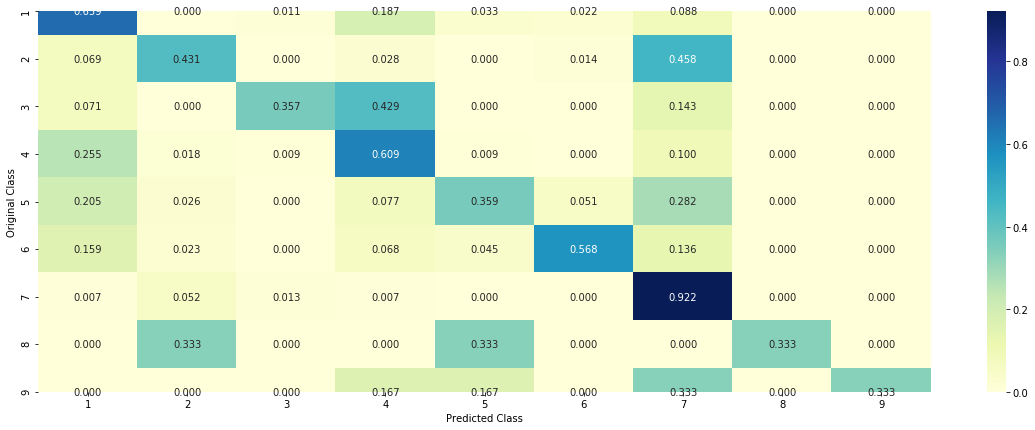

In [81]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [83]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[3.251e-01 2.140e-02 6.000e-04 5.859e-01 8.600e-03 2.500e-03 4.830e-02
  7.300e-03 4.000e-04]]
Actual Class : 4
--------------------------------------------------
169 Text feature [suppressor] present in test data point [True]
301 Text feature [stability] present in test data point [True]
334 Text feature [precipitate] present in test data point [True]
338 Text feature [pet28a] present in test data point [True]
366 Text feature [10a] present in test data point [True]
452 Text feature [c242s] present in test data point [True]
492 Text feature [w303] present in test data point [True]
Out of the top  500  features  7 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [84]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0525 0.1519 0.0065 0.0658 0.0153 0.0115 0.688  0.0054 0.0031]]
Actual Class : 7
--------------------------------------------------
98 Text feature [constitutive] present in test data point [True]
102 Text feature [downstream] present in test data point [True]
175 Text feature [expressing] present in test data point [True]
179 Text feature [activated] present in test data point [True]
202 Text feature [transformed] present in test data point [True]
208 Text feature [ba] present in test data point [True]
211 Text feature [f3] present in test data point [True]
220 Text feature [mitogen] present in test data point [True]
222 Text feature [extracellular] present in test data point [True]
251 Text feature [activation] present in test data point [True]
320 Text feature [phospho] present in test data point [True]
396 Text feature [serum] present in test data point [True]
405 Text feature [immunoprecipitants] present in test data point [Tru

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.3757817560395331
for C = 0.0001
Log Loss : 1.3204097331488915
for C = 0.001
Log Loss : 1.2084343189866005
for C = 0.01
Log Loss : 1.1813900154161296
for C = 0.1
Log Loss : 1.4091362260568177
for C = 1
Log Loss : 1.726411888979664
for C = 10
Log Loss : 1.7386733173992401
for C = 100
Log Loss : 1.7386733052210164


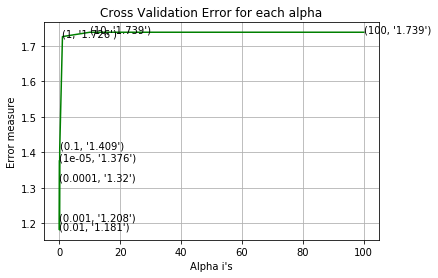

For values of best alpha =  0.01 The train log loss is: 0.7398755386164525
For values of best alpha =  0.01 The cross validation log loss is: 1.1813900154161296
For values of best alpha =  0.01 The test log loss is: 1.1140980659723592


In [85]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

In [0]:
x.add_row(['SVM',0.740,1.181,1.114,36.65])

Log loss : 1.1813900154161296
Number of mis-classified points : 0.36654135338345867
-------------------- Confusion matrix --------------------


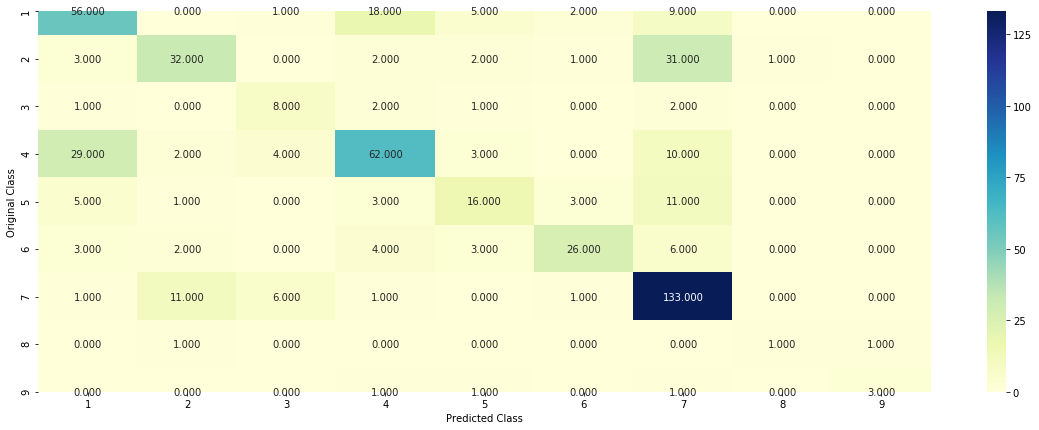

-------------------- Precision matrix (Columm Sum=1) --------------------


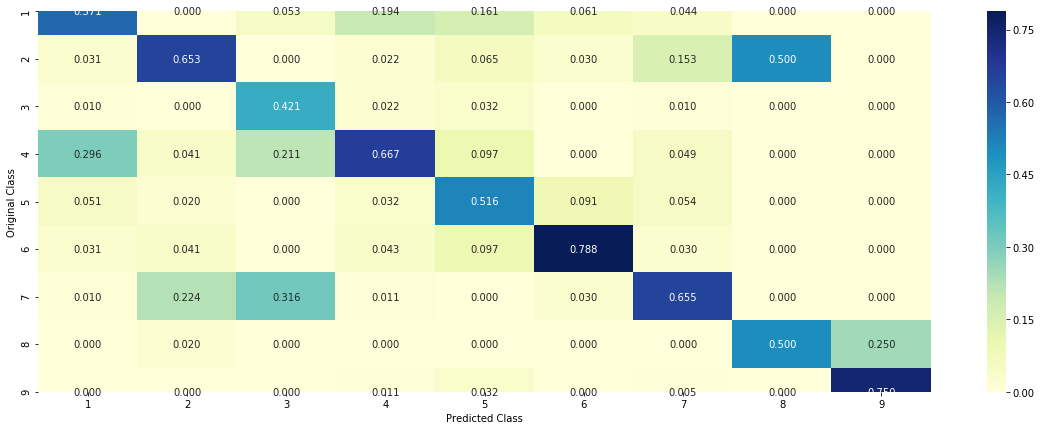

-------------------- Recall matrix (Row sum=1) --------------------


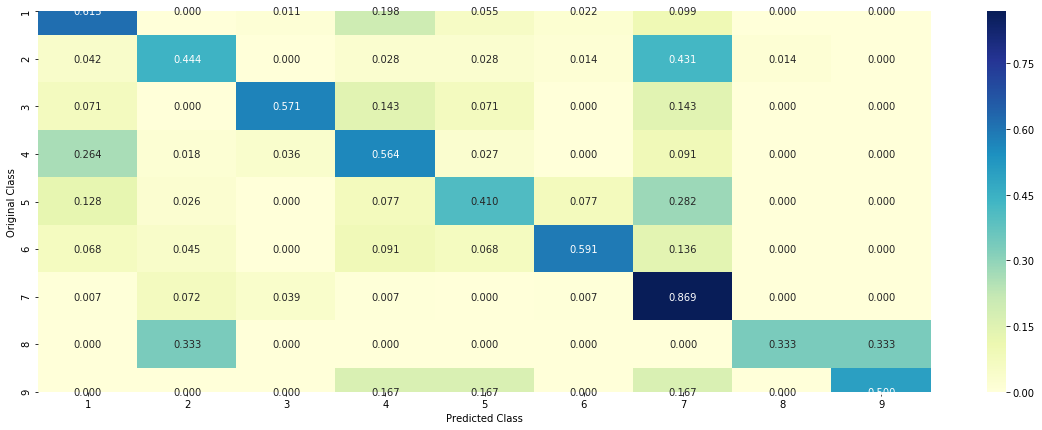

In [86]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [88]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2571 0.0445 0.0077 0.4369 0.047  0.0169 0.1793 0.0075 0.0032]]
Actual Class : 4
--------------------------------------------------
49 Text feature [suppressor] present in test data point [True]
74 Text feature [pet28a] present in test data point [True]
95 Text feature [c124s] present in test data point [True]
210 Text feature [stability] present in test data point [True]
270 Text feature [mislocalization] present in test data point [True]
400 Text feature [10a] present in test data point [True]
405 Text feature [localization] present in test data point [True]
411 Text feature [condition] present in test data point [True]
478 Text feature [precipitate] present in test data point [True]
Out of the top  500  features  9 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [89]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0869 0.097  0.011  0.092  0.0327 0.024  0.6478 0.0052 0.0034]]
Actual Class : 7
--------------------------------------------------
42 Text feature [downstream] present in test data point [True]
48 Text feature [expressing] present in test data point [True]
142 Text feature [mitogen] present in test data point [True]
146 Text feature [constitutive] present in test data point [True]
171 Text feature [transformed] present in test data point [True]
176 Text feature [620] present in test data point [True]
196 Text feature [cdnas] present in test data point [True]
199 Text feature [activation] present in test data point [True]
204 Text feature [activated] present in test data point [True]
213 Text feature [phospho] present in test data point [True]
301 Text feature [serum] present in test data point [True]
312 Text feature [phosphorylation] present in test data point [True]
313 Text feature [spontaneously] present in test data point [Tru

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [90]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.289600014708888
for n_estimators = 100 and max depth =  10
Log Loss : 1.2278286614953666
for n_estimators = 200 and max depth =  5
Log Loss : 1.282326905110391
for n_estimators = 200 and max depth =  10
Log Loss : 1.2286810689411112
for n_estimators = 500 and max depth =  5
Log Loss : 1.2745952015375455
for n_estimators = 500 and max depth =  10
Log Loss : 1.2136416370724747
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2708307970889934
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2093763216630837
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2675281857581082
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2093273891483571
For values of best estimator =  2000 The train log loss is: 0.6824112515046744
For values of best estimator =  2000 The cross validation log loss is: 1.2093273891483571
For values of best estimator =  2000 The test log loss is: 1.1825183640356267


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

In [0]:
x.add_row(['RF with OHE',0.682,1.209,1.183,41.35])

Log loss : 1.2093273891483571
Number of mis-classified points : 0.41353383458646614
-------------------- Confusion matrix --------------------


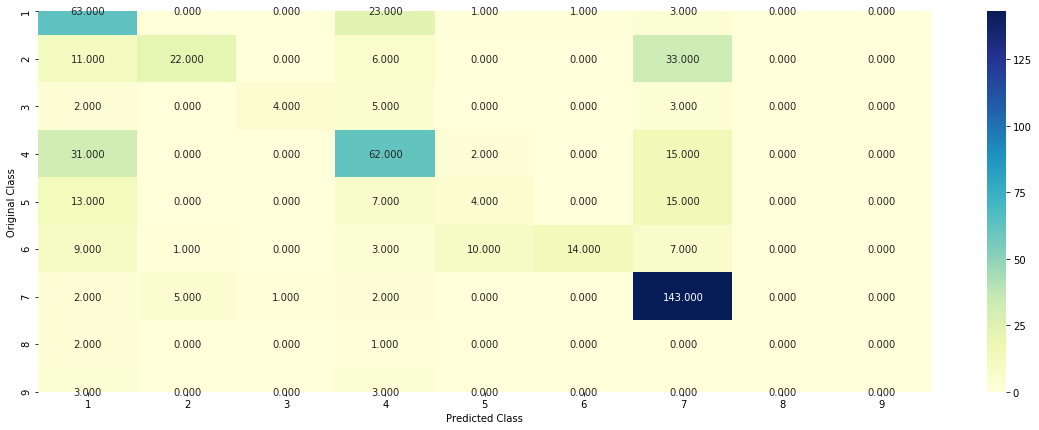

-------------------- Precision matrix (Columm Sum=1) --------------------


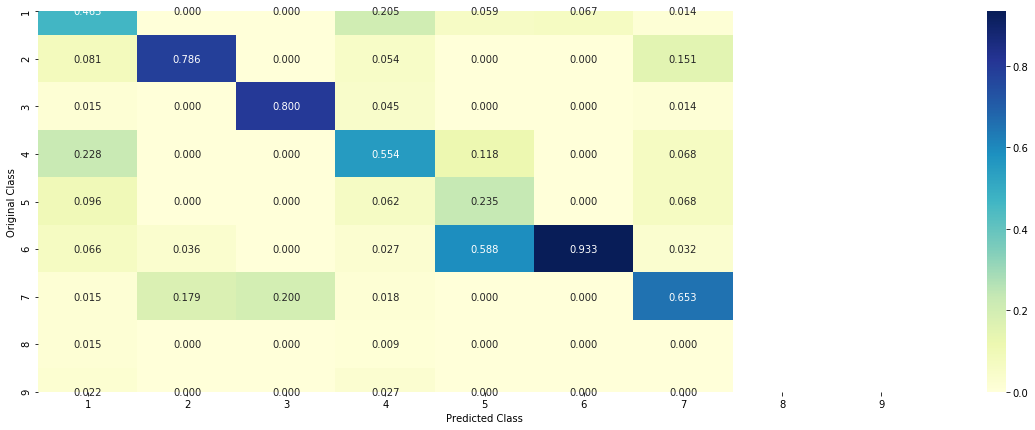

-------------------- Recall matrix (Row sum=1) --------------------


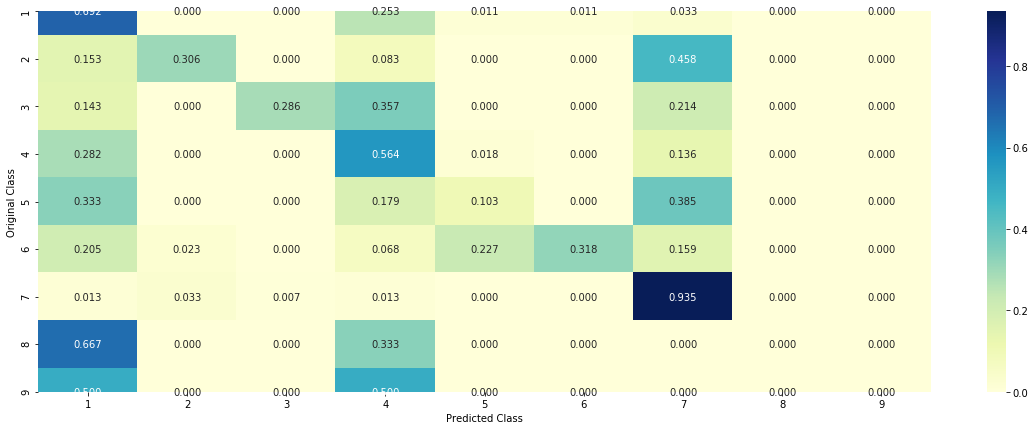

In [91]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [93]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.3394 0.0584 0.0184 0.3609 0.0535 0.0409 0.1129 0.0073 0.0083]]
Actual Class : 4
--------------------------------------------------
1 Text feature [kinase] present in test data point [True]
3 Text feature [activation] present in test data point [True]
4 Text feature [suppressor] present in test data point [True]
6 Text feature [constitutive] present in test data point [True]
7 Text feature [signaling] present in test data point [True]
9 Text feature [inhibitor] present in test data point [True]
10 Text feature [treatment] present in test data point [True]
12 Text feature [function] present in test data point [True]
20 Text feature [stability] present in test data point [True]
21 Text feature [functional] present in test data point [True]
26 Text feature [downstream] present in test data point [True]
29 Text feature [growth] present in test data point [True]
31 Text feature [inhibition] present in test data point [True]
34 Text featu

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [94]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0783 0.1181 0.0186 0.1018 0.043  0.034  0.5943 0.0061 0.0059]]
Actuall Class : 7
--------------------------------------------------
1 Text feature [kinase] present in test data point [True]
2 Text feature [tyrosine] present in test data point [True]
3 Text feature [activation] present in test data point [True]
6 Text feature [constitutive] present in test data point [True]
7 Text feature [signaling] present in test data point [True]
8 Text feature [missense] present in test data point [True]
9 Text feature [inhibitor] present in test data point [True]
10 Text feature [treatment] present in test data point [True]
12 Text feature [function] present in test data point [True]
13 Text feature [erk] present in test data point [True]
14 Text feature [phosphorylation] present in test data point [True]
15 Text feature [activated] present in test data point [True]
21 Text feature [functional] present in test data point [True]
24 Text feature

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [95]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.284175691302965
for n_estimators = 10 and max depth =  3
Log Loss : 1.7650782678264927
for n_estimators = 10 and max depth =  5
Log Loss : 1.5690876885398861
for n_estimators = 10 and max depth =  10
Log Loss : 1.9761905380305191
for n_estimators = 50 and max depth =  2
Log Loss : 1.956539059312965
for n_estimators = 50 and max depth =  3
Log Loss : 1.5737101898462726
for n_estimators = 50 and max depth =  5
Log Loss : 1.3109502875512387
for n_estimators = 50 and max depth =  10
Log Loss : 1.7304454021956586
for n_estimators = 100 and max depth =  2
Log Loss : 1.7906507356392283
for n_estimators = 100 and max depth =  3
Log Loss : 1.59577572249068
for n_estimators = 100 and max depth =  5
Log Loss : 1.2993059184475704
for n_estimators = 100 and max depth =  10
Log Loss : 1.7227561105499958
for n_estimators = 200 and max depth =  2
Log Loss : 1.7796190061965145
for n_estimators = 200 and max depth =  3
Log Loss : 1.640743181004046
fo

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

In [0]:
x.add_row(['RF with RC',0.050,1.299,1.254,45.11])

Log loss : 1.2993059184475704
Number of mis-classified points : 0.45112781954887216
-------------------- Confusion matrix --------------------


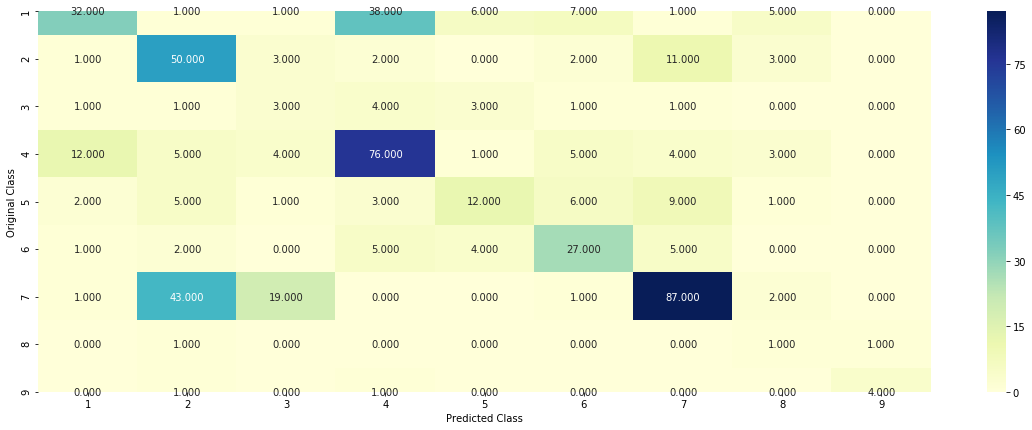

-------------------- Precision matrix (Columm Sum=1) --------------------


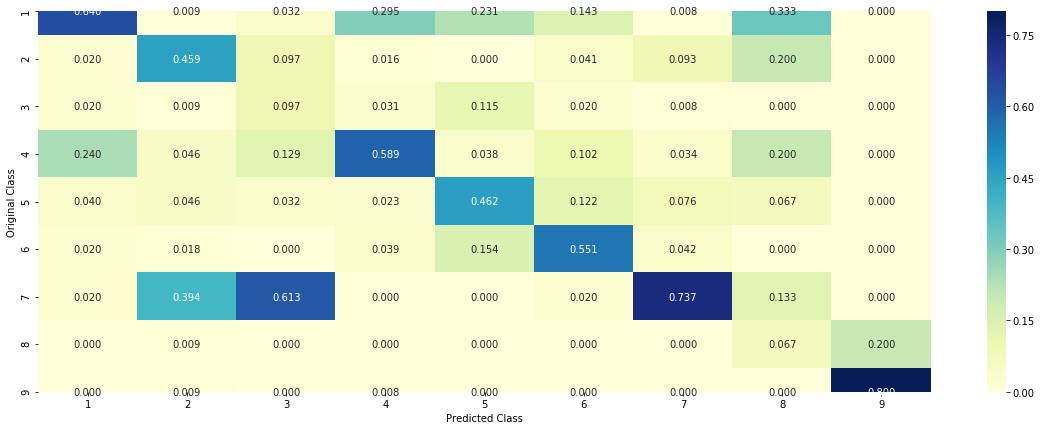

-------------------- Recall matrix (Row sum=1) --------------------


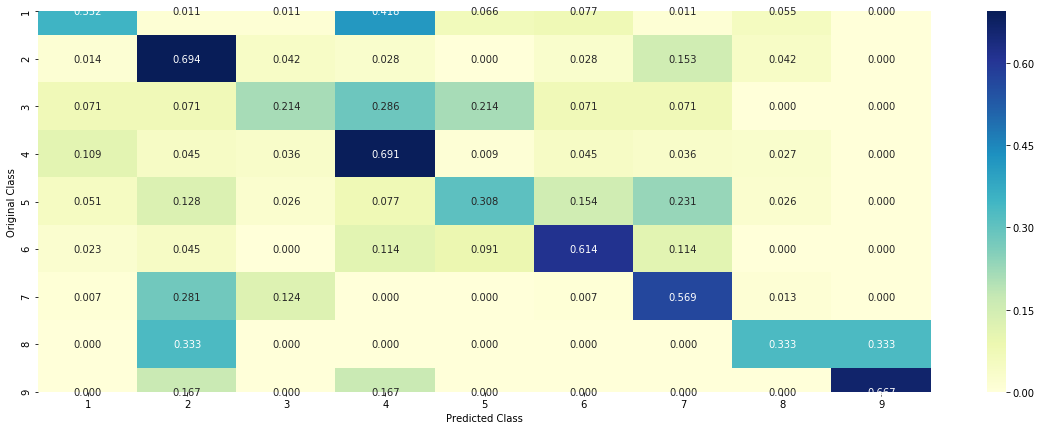

In [96]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [99]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 4
Predicted Class Probabilities: [[0.2031 0.016  0.1397 0.5085 0.0476 0.0486 0.0064 0.0152 0.0149]]
Actual Class : 4
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [100]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 7
Predicted Class Probabilities: [[0.0229 0.3034 0.1323 0.0353 0.0296 0.0569 0.3741 0.0224 0.0231]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [101]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.15
Support vector machines : Log Loss: 1.73
Naive Bayes : Log Loss: 1.30
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.041
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.540
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.166
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.275
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.570


<h3>4.7.2 testing the model with the best hyper parameters</h3>

In [0]:
x.add_row(['Stacking Classifier(with LR, NB, SVM)',0.63,1.166,1.099,35.49])

Log loss (train) on the stacking classifier : 0.6301703941084831
Log loss (CV) on the stacking classifier : 1.165835037687397
Log loss (test) on the stacking classifier : 1.0985399003507827
Number of missclassified point : 0.3548872180451128
-------------------- Confusion matrix --------------------


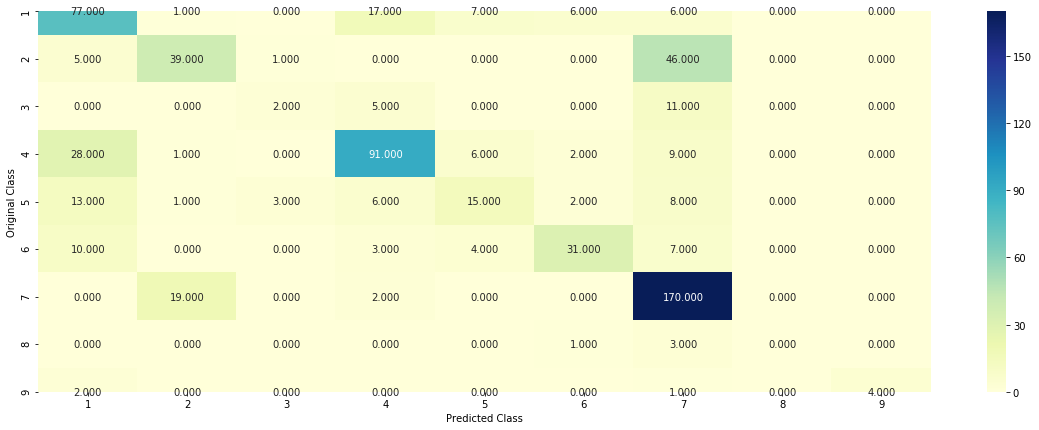

-------------------- Precision matrix (Columm Sum=1) --------------------


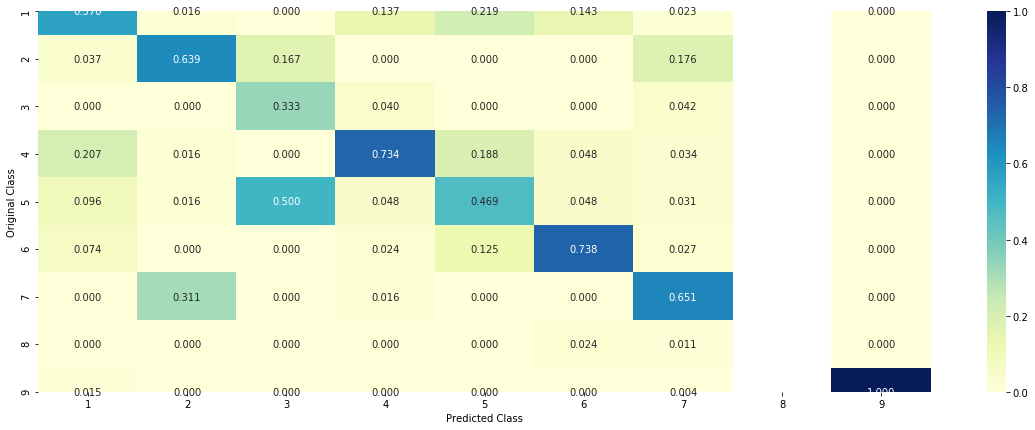

-------------------- Recall matrix (Row sum=1) --------------------


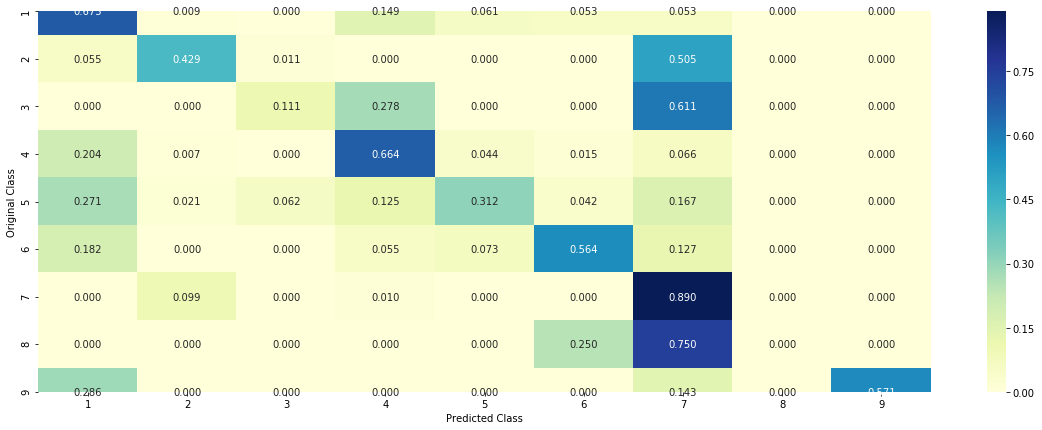

In [102]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8907023233741694
Log loss (CV) on the VotingClassifier : 1.2239856475981346
Log loss (test) on the VotingClassifier : 1.2001490007649682
Number of missclassified point : 0.35789473684210527
-------------------- Confusion matrix --------------------


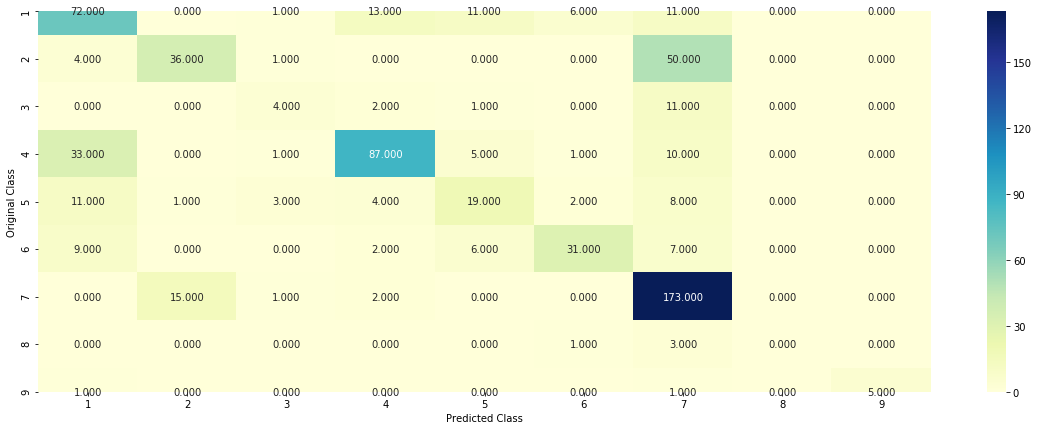

-------------------- Precision matrix (Columm Sum=1) --------------------


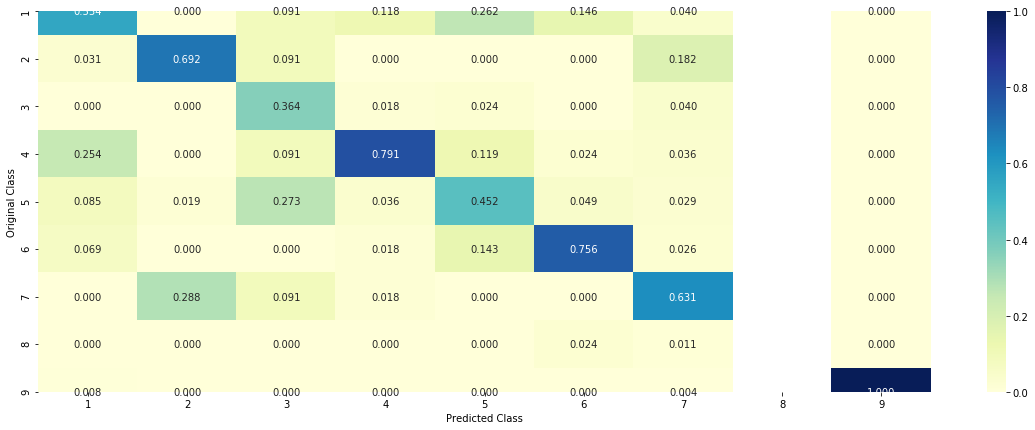

-------------------- Recall matrix (Row sum=1) --------------------


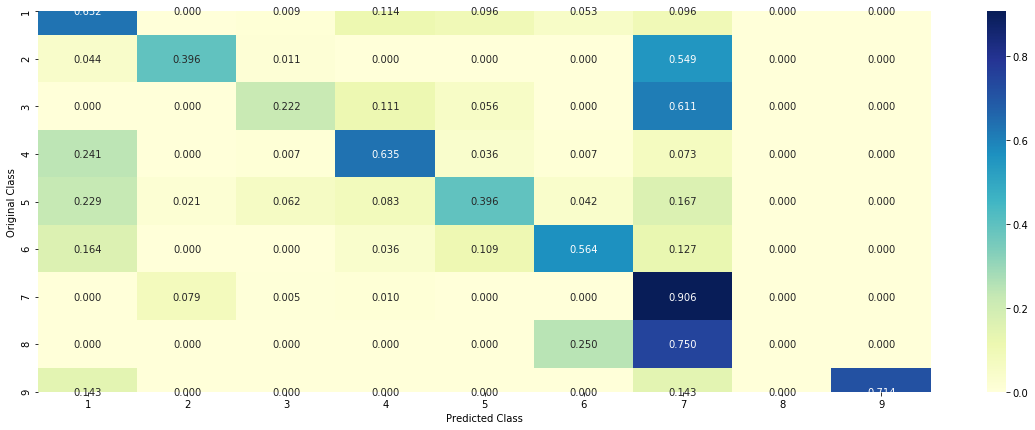

In [104]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

In [0]:
x.add_row(['Voting Classifier(with LR, SVM, NB)',0.89,1.224,1.200,35.79]) 

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

<H1>Applying Tfidf features                                                 

In [0]:
tfidf_vect = TfidfVectorizer(min_df = 3)

train_text_tfidf = tfidf_vect.fit_transform(train_df['TEXT'])
train_text_tfidf = normalize(train_text_tfidf,axis = 0)

cv_text_tfidf = tfidf_vect.transform(cv_df['TEXT'])
cv_text_tfidf = normalize(cv_text_tfidf,axis = 0)

test_text_tfidf = tfidf_vect.transform(test_df['TEXT'])
test_text_tfidf = normalize(test_text_tfidf,axis = 0) 

In [110]:
print(train_text_tfidf.shape)
print(cv_text_tfidf.shape)
print(test_text_tfidf.shape)

(2124, 54063)
(532, 54063)
(665, 54063)


<h4> checking how much tfidf vectors of 'TEXT' are important

For values of alpha =  1e-05 The log loss is: 1.2846113675662025
For values of alpha =  0.0001 The log loss is: 1.1757736443602156
For values of alpha =  0.001 The log loss is: 1.1900072822937944
For values of alpha =  0.01 The log loss is: 1.320829938690181
For values of alpha =  0.1 The log loss is: 1.5336592940073077
For values of alpha =  1 The log loss is: 1.6695896891437783


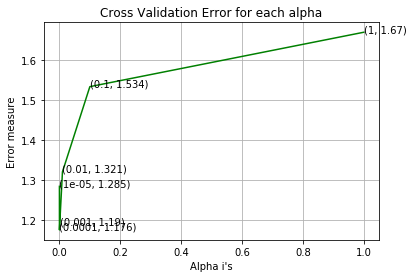

For values of best alpha =  0.0001 The train log loss is: 0.6919705679340145
For values of best alpha =  0.0001 The cross validation log loss is: 1.1757736443602156
For values of best alpha =  0.0001 The test log loss is: 1.097835308246166


In [111]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_tfidf, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_tfidf, y_train)
    predict_y = sig_clf.predict_proba(cv_text_tfidf)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_tfidf, y_train)

predict_y = sig_clf.predict_proba(train_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


The cv and test loss are not very high. Therefore it proves to be an important feature

<h4> Combining these tfidf text features to build models further

In [0]:
x_train_tfidf = hstack((train_gene_feature_onehotCoding, train_variation_feature_onehotCoding, train_text_tfidf))
x_cv_tfidf = hstack((cv_gene_feature_onehotCoding, cv_variation_feature_onehotCoding, cv_text_tfidf))
x_test_tfidf = hstack((test_gene_feature_onehotCoding, test_variation_feature_onehotCoding, test_text_tfidf))

In [113]:
print(x_train_tfidf.shape)
print(x_cv_tfidf.shape)
print(x_test_tfidf.shape)

(2124, 56251)
(532, 56251)
(665, 56251)


In [0]:
# now we'll build all models with these data-
    #x_train_tfidf, x_cv_tfidf, x_test_tfidf

In [0]:
pt_tfidf = PrettyTable()
pt_tfidf.field_names = ['model', 'train loss','cv loss', 'test loss', '%misclassification']


<h1> Naive Bayes

alpha: 1e-05
log loss: 1.3125612777015971
alpha: 0.0001
log loss: 1.3057384793964755
alpha: 0.001
log loss: 1.2934809927222302
alpha: 0.1
log loss: 1.3046749665863628
alpha: 1
log loss: 1.3419728970885463
alpha: 10
log loss: 1.411982716572791
alpha: 100
log loss: 1.3385266173410502
alpha: 1000
log loss: 1.295962439776477


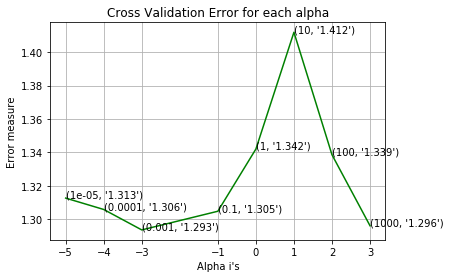

In [116]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []

for i in alpha:
  clf = MultinomialNB(alpha = i)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



In [117]:
best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha = alpha[best_alpha])
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))

train loss: 0.8453287946096242
cv loss: 1.2934809927222302
test loss: 1.239856859612582


In [118]:
print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

Number of missclassified point in cv data : 0.40037593984962405
Number of missclassified point in test data: 0.38646616541353385


In [0]:
pt_tfidf.add_row(['Naive Bayes',0.845,1.249,1.24,40.03])  

-------------------- Confusion matrix --------------------


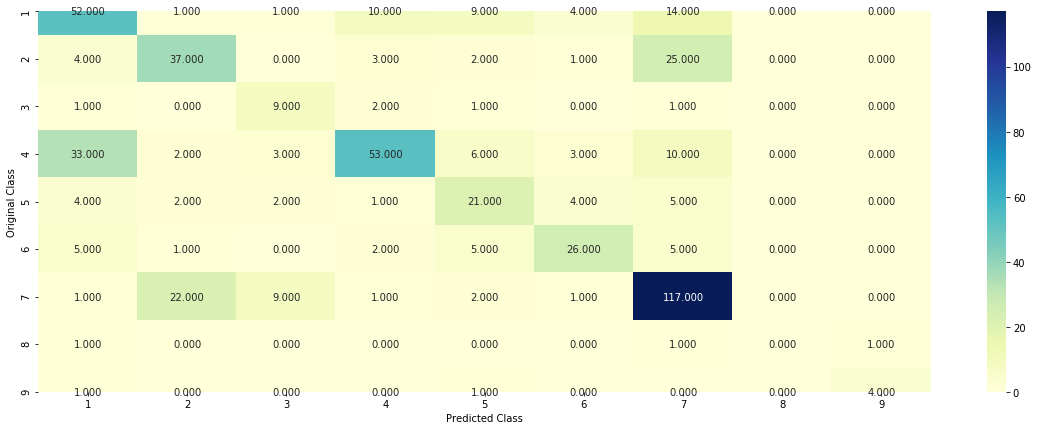

-------------------- Precision matrix (Columm Sum=1) --------------------


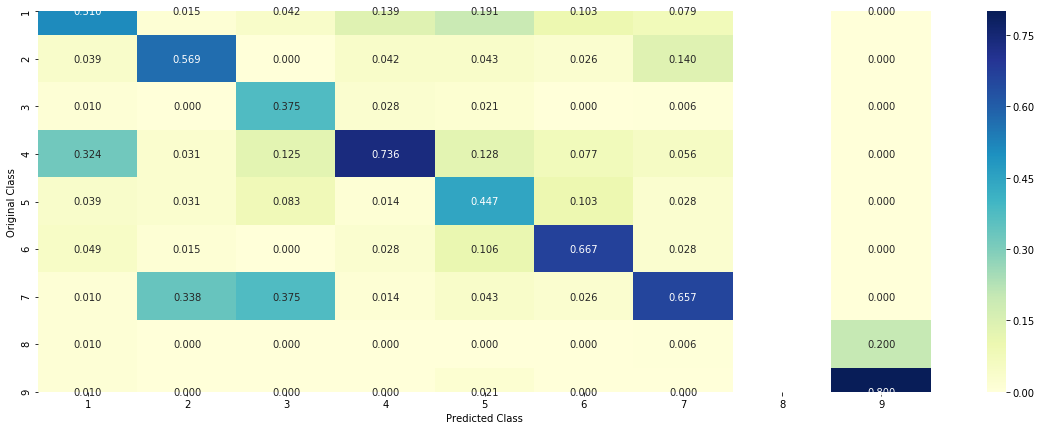

-------------------- Recall matrix (Row sum=1) --------------------


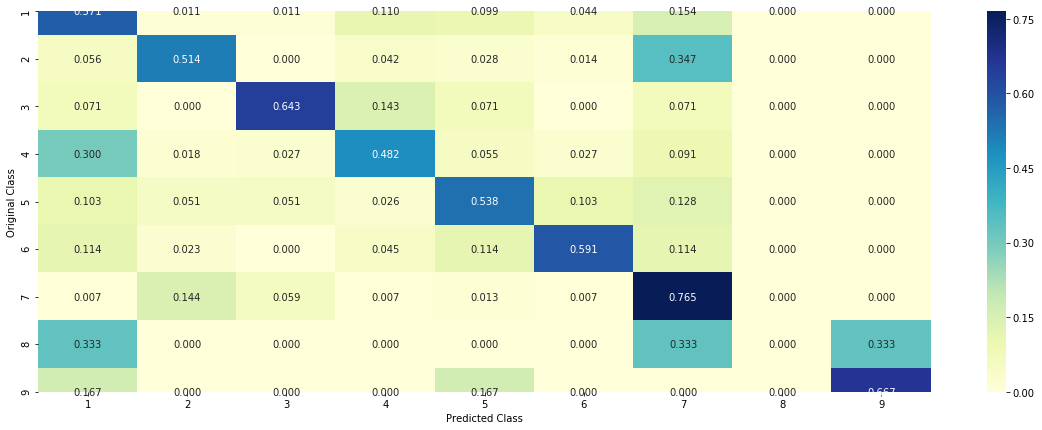

In [120]:
plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

<H1> KNN

alpha: 5
log loss: 1.3323705267293053
alpha: 11
log loss: 1.4467121440339985
alpha: 15
log loss: 1.4935014834198934
alpha: 21
log loss: 1.5124961177357643
alpha: 31
log loss: 1.497934114722748
alpha: 41
log loss: 1.4775568803962225
alpha: 51
log loss: 1.4918724839753752
alpha: 99
log loss: 1.4922337235623406


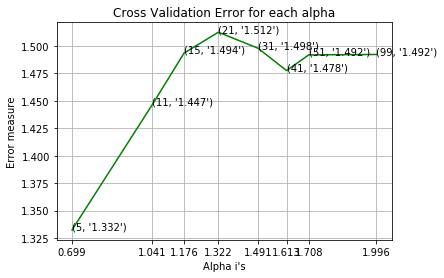

train loss: 1.0127382828303224
cv loss: 1.3323705267293053
test loss: 1.292721776685707


In [121]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []

for i in alpha:
  clf = KNeighborsClassifier(n_neighbors=i)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors = alpha[best_alpha])
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))

In [122]:
print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

Number of missclassified point in cv data : 0.4605263157894737
Number of missclassified point in test data: 0.43609022556390975


In [0]:
pt_tfidf.add_row(['K-NN',1.01,1.33,1.292,46.05]) 

-------------------- Confusion matrix --------------------


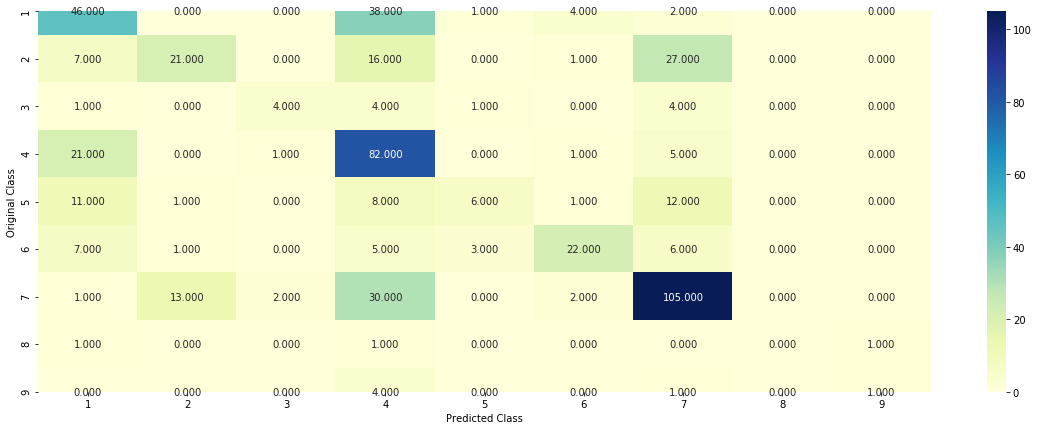

-------------------- Precision matrix (Columm Sum=1) --------------------


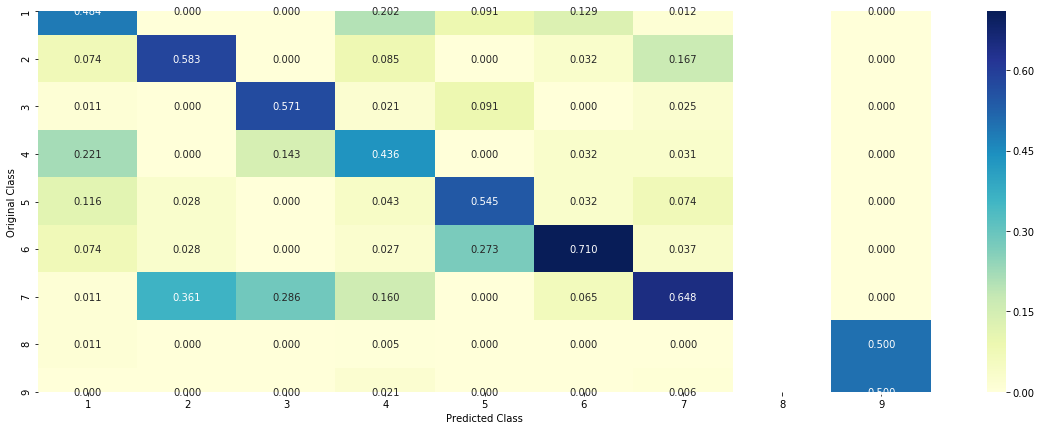

-------------------- Recall matrix (Row sum=1) --------------------


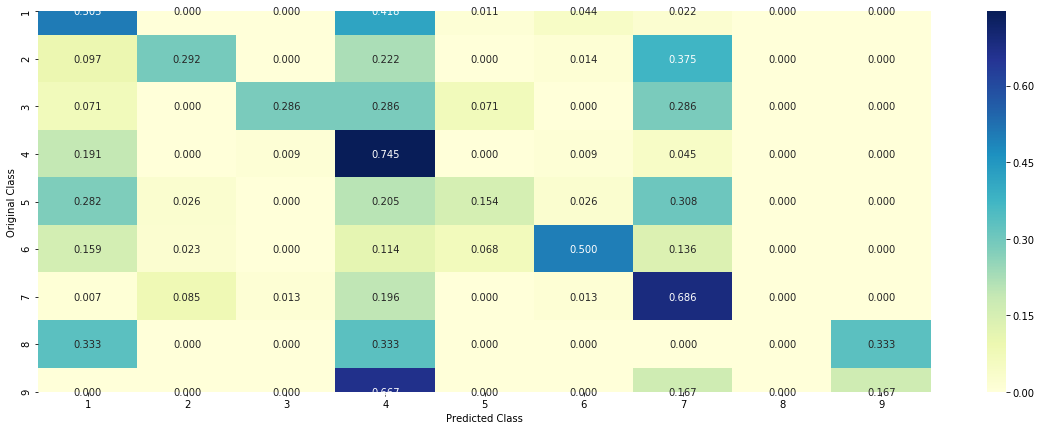

In [124]:
plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

<h1> LR with class balancing

alpha: 1e-06
log loss: 1.3423103375623993
alpha: 1e-05
log loss: 1.3369842273349108
alpha: 0.0001
log loss: 1.1330422011877825
alpha: 0.001
log loss: 1.121071493544374
alpha: 0.01
log loss: 1.17938353894698
alpha: 0.1
log loss: 1.3011771664153982
alpha: 1
log loss: 1.4892895712390923
alpha: 10
log loss: 1.518932602664455
alpha: 100
log loss: 1.5220944894748043


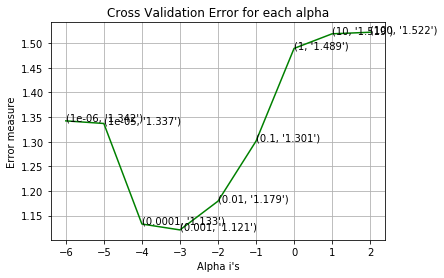

train loss: 0.5261645880511833
cv loss: 1.121071493544374
test loss: 1.0018090344114414
Number of missclassified point in cv data : 0.35902255639097747
Number of missclassified point in test data: 0.33383458646616543
-------------------- Confusion matrix --------------------


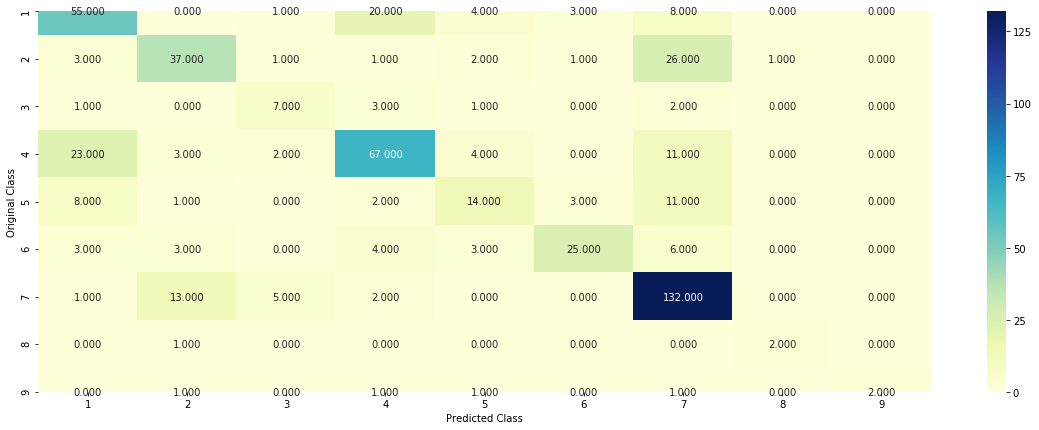

-------------------- Precision matrix (Columm Sum=1) --------------------


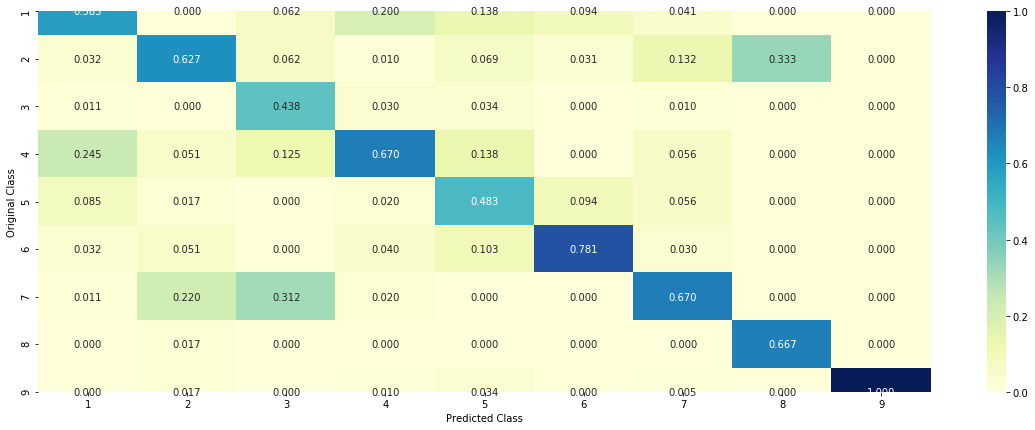

-------------------- Recall matrix (Row sum=1) --------------------


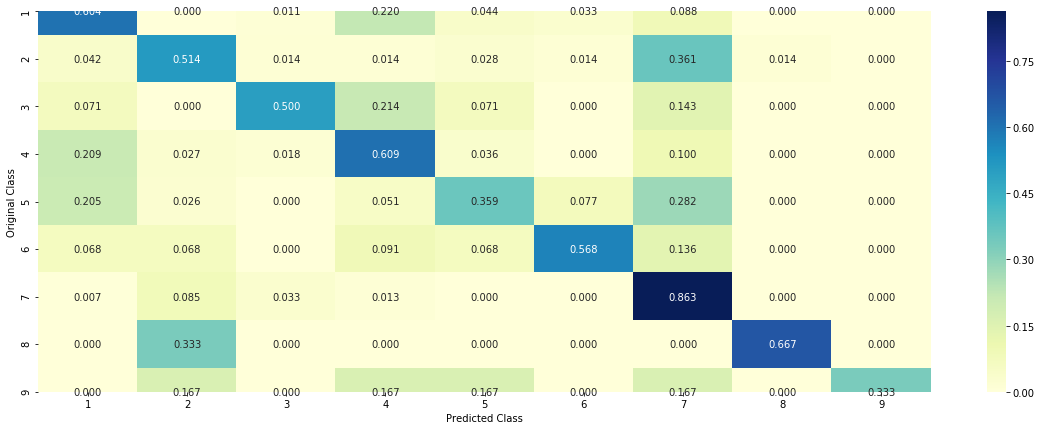

In [125]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='log',alpha = i,class_weight='balanced',penalty='l2', random_state=42)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='log',alpha = alpha[best_alpha],class_weight='balanced',penalty='l2', random_state=42)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_tfidf.add_row(['LR with class balancing',0.526,1.121,1.001,35.90]) 

<h1> LR without class balancing

alpha: 1e-06
log loss: 1.3215967001123918
alpha: 1e-05
log loss: 1.273366542291813
alpha: 0.0001
log loss: 1.1530648935647527
alpha: 0.001
log loss: 1.151567085701242
alpha: 0.01
log loss: 1.2515554019259745
alpha: 0.1
log loss: 1.446422678316762
alpha: 1
log loss: 1.5794262243605488
alpha: 10
log loss: 1.6132420613088168
alpha: 100
log loss: 1.6171365038084584


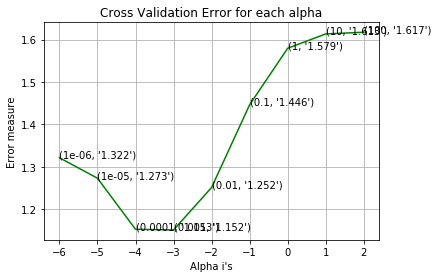

train loss: 0.5227512473914353
cv loss: 1.151567085701242
test loss: 1.0221312716233146
Number of missclassified point in cv data : 0.35526315789473684
Number of missclassified point in test data: 0.33533834586466166
-------------------- Confusion matrix --------------------


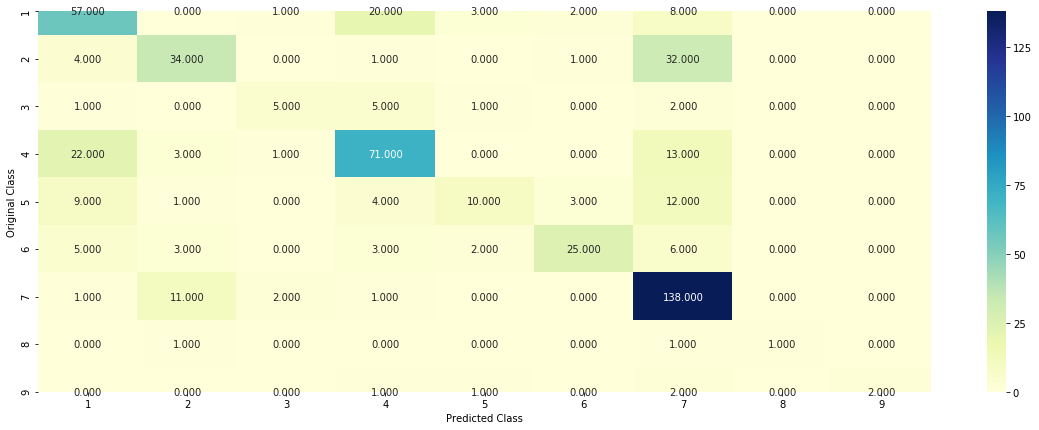

-------------------- Precision matrix (Columm Sum=1) --------------------


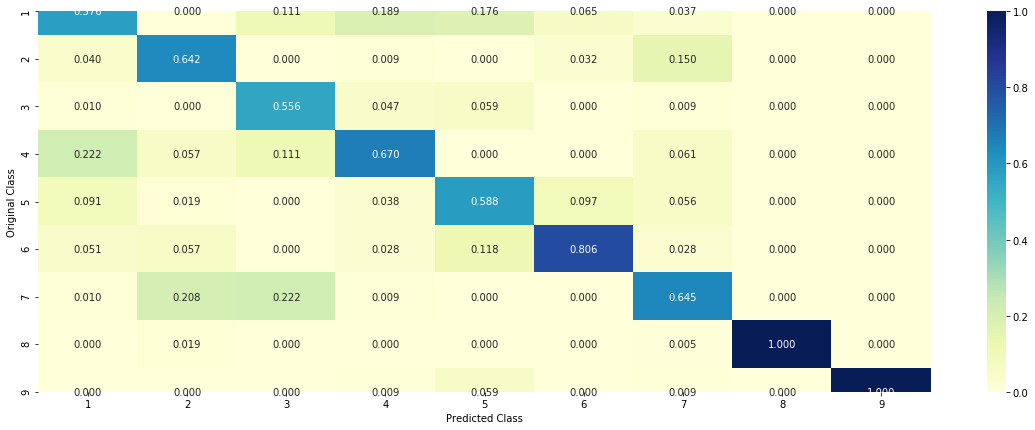

-------------------- Recall matrix (Row sum=1) --------------------


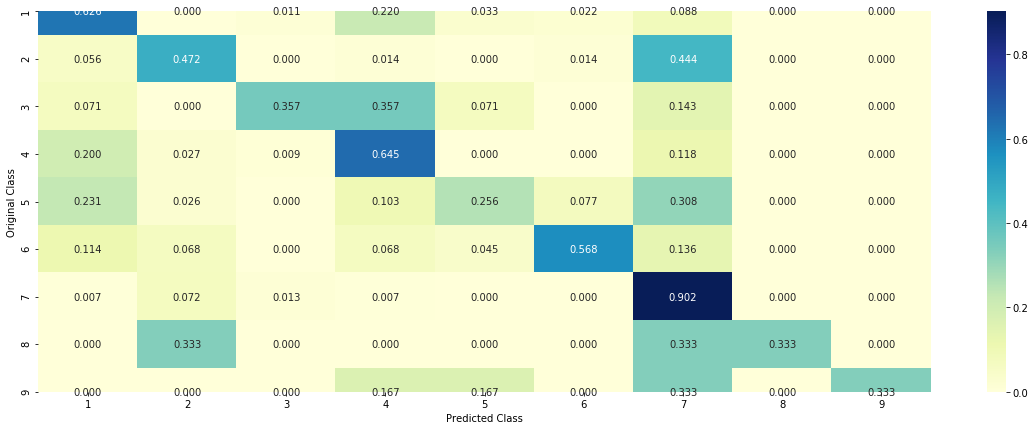

In [127]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='log',alpha = i,penalty='l2', random_state=42)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='log',alpha = alpha[best_alpha],penalty='l2', random_state=42)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_tfidf.add_row(['LR without class balancing',0.523,1.151,1.022,35.52]) 

<h1> Linear SVM

alpha: 1e-05
log loss: 1.3272430411595764
alpha: 0.0001
log loss: 1.313627487840524
alpha: 0.001
log loss: 1.138439340096332
alpha: 0.01
log loss: 1.1584931544919013
alpha: 0.1
log loss: 1.2580758998512394
alpha: 1
log loss: 1.5229184130511095
alpha: 10
log loss: 1.5225572627783488
alpha: 100
log loss: 1.522557235258517


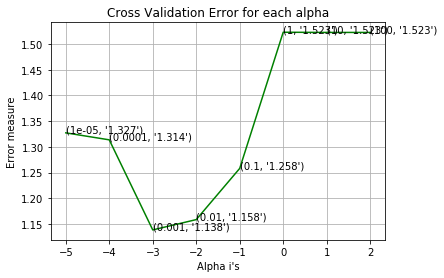

train loss: 0.5768750744917832
cv loss: 1.138439340096332
test loss: 1.0746008927251676
Number of missclassified point in cv data : 0.37406015037593987
Number of missclassified point in test data: 0.3263157894736842
-------------------- Confusion matrix --------------------


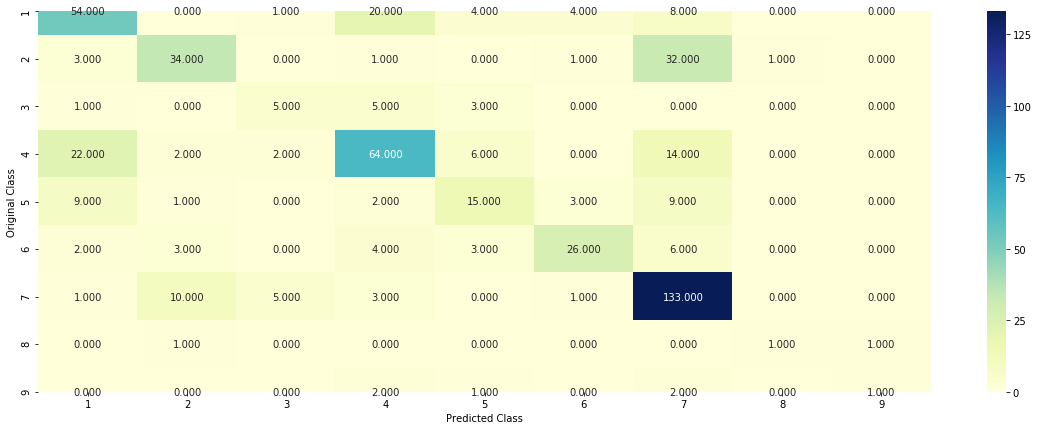

-------------------- Precision matrix (Columm Sum=1) --------------------


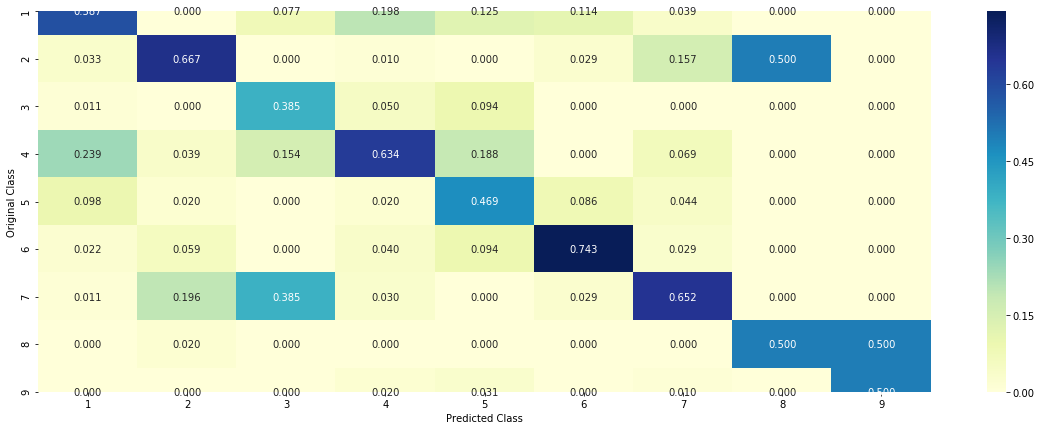

-------------------- Recall matrix (Row sum=1) --------------------


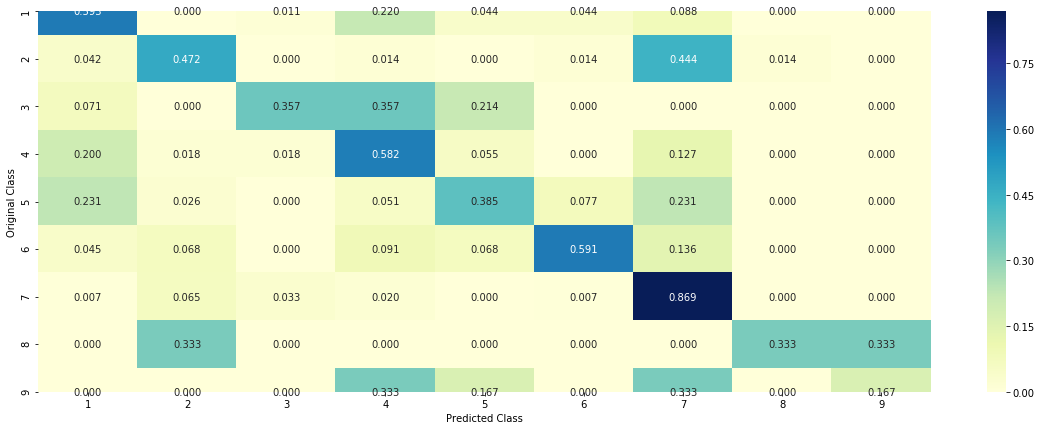

In [129]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='hinge',alpha = i,class_weight ='balanced',penalty='l2', random_state=42) #balanced because it proved to better results with LR
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='hinge',alpha = alpha[best_alpha],penalty='l2',class_weight ='balanced',random_state=42)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_tfidf.add_row(['Linear SVM',0.577,1.139,1.075,37.41]) 

<h1> Random Forest

for n_estimators = 100 and max depth =  5
log loss: 1.255296149611966
for n_estimators = 100 and max depth =  10
log loss: 1.2001864633102963
for n_estimators = 200 and max depth =  5
log loss: 1.2470538382313865
for n_estimators = 200 and max depth =  10
log loss: 1.1885497129330063
for n_estimators = 500 and max depth =  5
log loss: 1.238557343891838
for n_estimators = 500 and max depth =  10
log loss: 1.1813893303250111
for n_estimators = 1000 and max depth =  5
log loss: 1.2368027624937894
for n_estimators = 1000 and max depth =  10
log loss: 1.179776014439723
for n_estimators = 2000 and max depth =  5
log loss: 1.229574766631124
for n_estimators = 2000 and max depth =  10
log loss: 1.1799872089789665


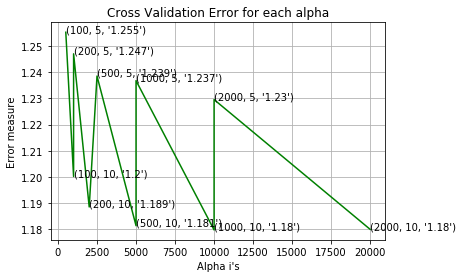

In [131]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]

cv_log_error_array = []

for i in alpha:
  for j in max_depth:
    clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1) 
    print("for n_estimators =", i,"and max depth = ", j)
    clf.fit(x_train_tfidf, y_train)
    sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
    sclf.fit(x_train_tfidf, y_train) #fit done

    y_predict = sclf.predict_proba(x_cv_tfidf)
    cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
    print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

train loss: 0.628065921008225
cv loss: 1.179776014439723
test loss: 1.150940213335267
Number of missclassified point in cv data : 0.37781954887218044
Number of missclassified point in test data: 0.3849624060150376
-------------------- Confusion matrix --------------------


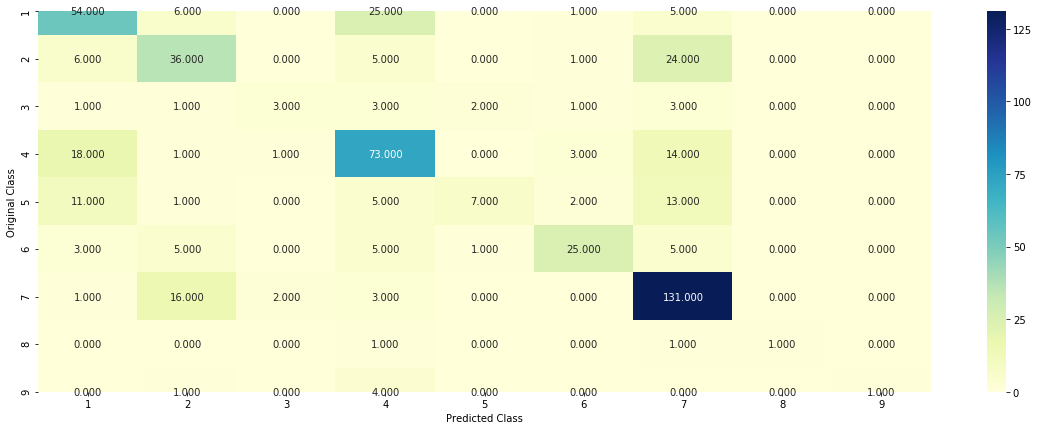

-------------------- Precision matrix (Columm Sum=1) --------------------


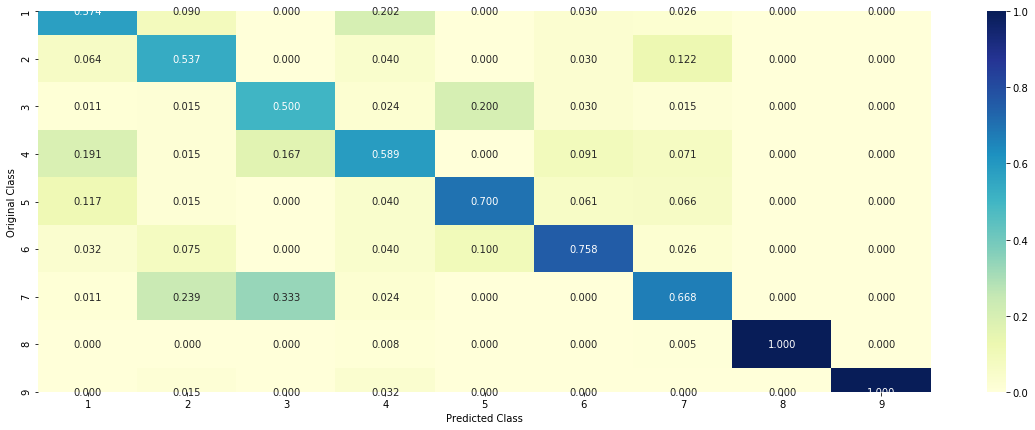

-------------------- Recall matrix (Row sum=1) --------------------


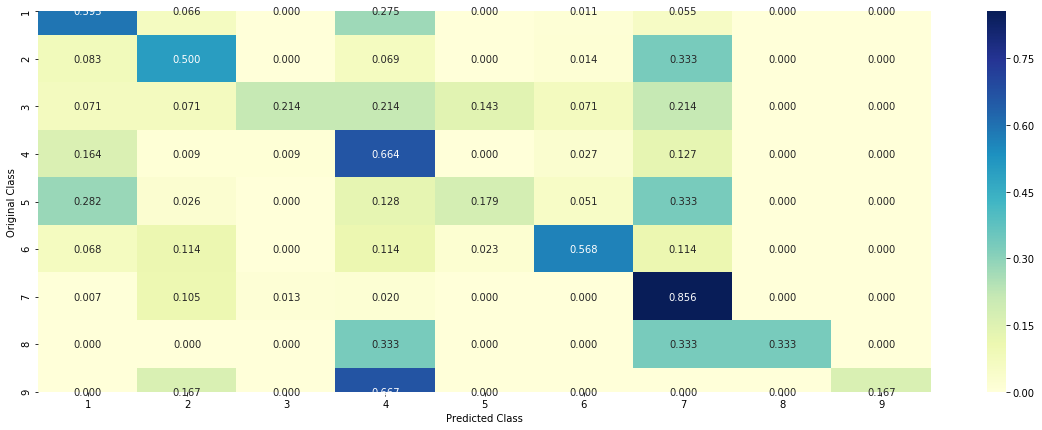

In [132]:
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_tfidf.add_row(['RF',0.628,1.179,1.151,37.78]) 

<h1> Stacking Classifier

In [134]:
cv_log_error_array = []

clf1 = MultinomialNB(alpha = 0.001) #NB
clf1.fit(x_train_tfidf, y_train)
sclf1 = CalibratedClassifierCV(clf1, method= 'sigmoid')

clf2 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0) #LR
clf2.fit(x_train_tfidf, y_train)
sclf2 = CalibratedClassifierCV(clf2, method= 'sigmoid')

clf3 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0) #SVM
clf3.fit(x_train_tfidf, y_train)
sclf3 = CalibratedClassifierCV(clf3, method= 'sigmoid')


alpha = [0.0001,0.001,0.01,0.1,1,10] 
for i in alpha:
  clf = SGDClassifier(alpha = i, loss='log',class_weight = 'balanced') #LR
  sclf = StackingClassifier(classifiers= [sclf1,sclf2,sclf3], meta_classifier= clf, use_probas=True)
  sclf.fit(x_train_tfidf, y_train)

  cv_log_error_array.append(log_loss(y_cv, sclf.predict_proba(x_cv_tfidf)))
  print('log loss:', log_loss(y_cv, sclf.predict_proba(x_cv_tfidf)))


log loss: 1.5160417415565197
log loss: 1.2588129533278014
log loss: 1.2838219180966837
log loss: 1.8292431132398272
log loss: 2.08205358502201
log loss: 2.1459855811840676


train loss: 0.4229288859131735
train loss: 1.2552153250086469
train loss: 1.156008589400847
Number of missclassified point in cv data : 0.37030075187969924
Number of missclassified point in test data: 0.3533834586466165
-------------------- Confusion matrix --------------------


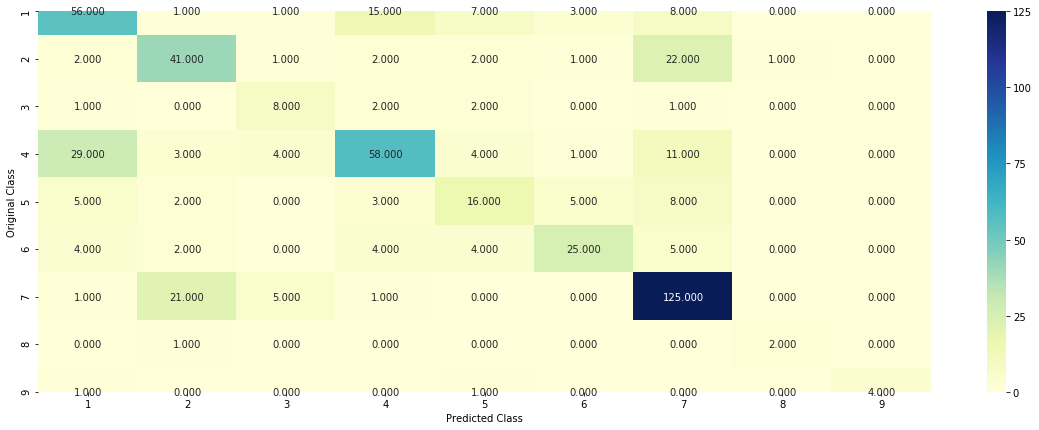

-------------------- Precision matrix (Columm Sum=1) --------------------


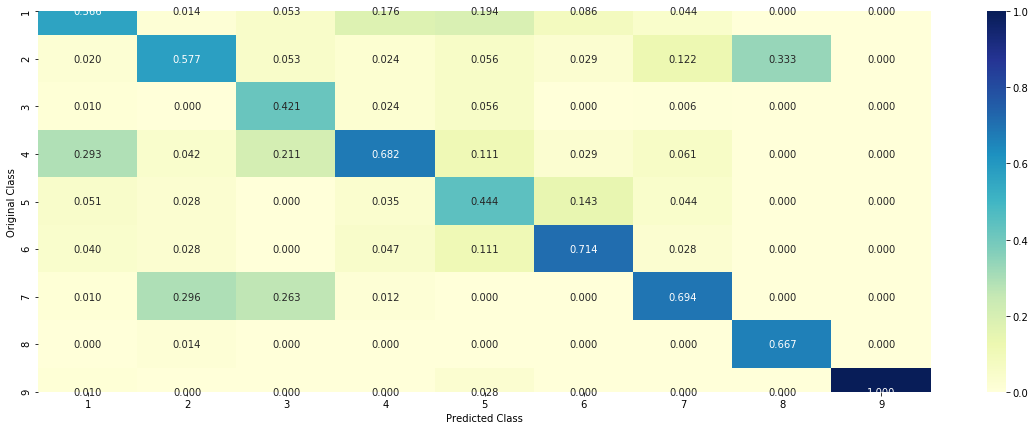

-------------------- Recall matrix (Row sum=1) --------------------


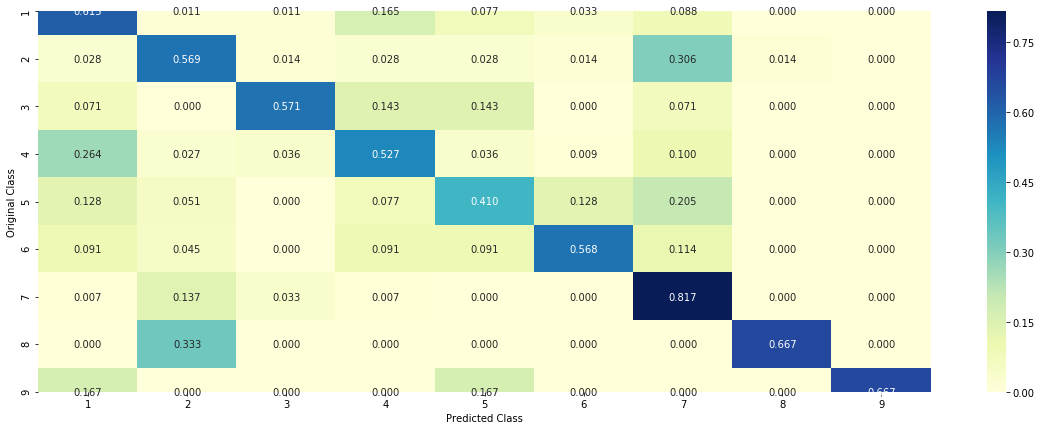

In [135]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha = alpha[best_alpha], loss='log',class_weight = 'balanced')
sclf = StackingClassifier(classifiers= [sclf1,sclf2,sclf3], meta_classifier= clf, use_probas=True)
sclf.fit(x_train_tfidf, y_train)

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("train loss:",log_loss(y_cv, predict_y))

predict_y = sclf.predict_proba(x_test_tfidf)
print("train loss:",log_loss(y_test, predict_y))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_tfidf.add_row(['Stacking Classifier',0.422,1.255,1.156,37.03]) 

<h1> Voting Classifier

train loss: 0.8338664948260518
train loss: 1.1571277774692794
train loss: 1.1253474851731122
Number of missclassified point in cv data : 0.38345864661654133
Number of missclassified point in test data: 0.34887218045112783
-------------------- Confusion matrix --------------------


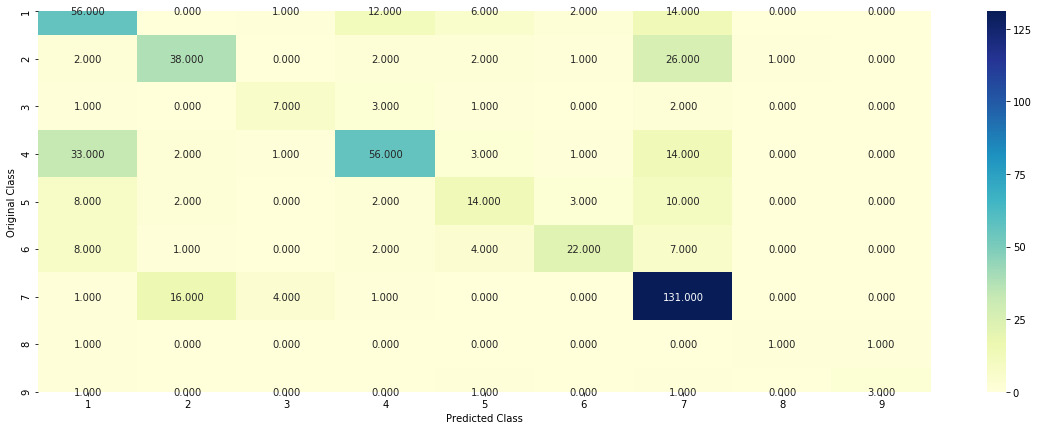

-------------------- Precision matrix (Columm Sum=1) --------------------


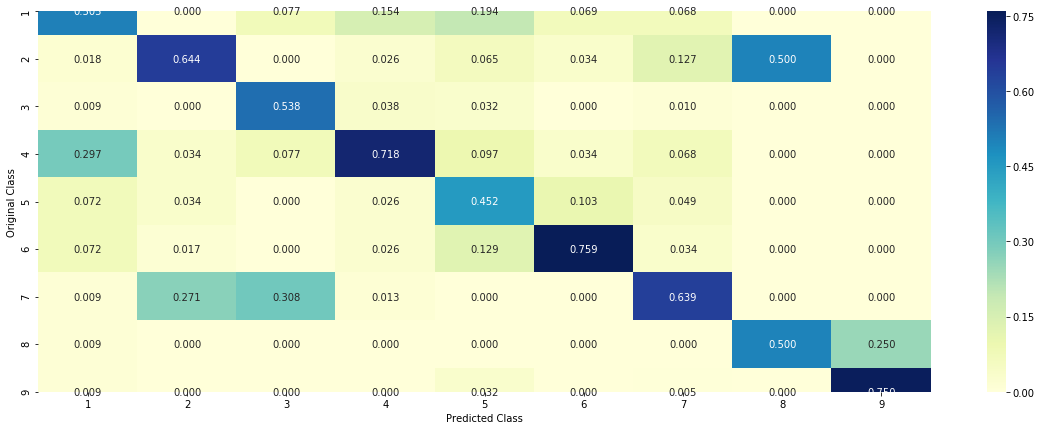

-------------------- Recall matrix (Row sum=1) --------------------


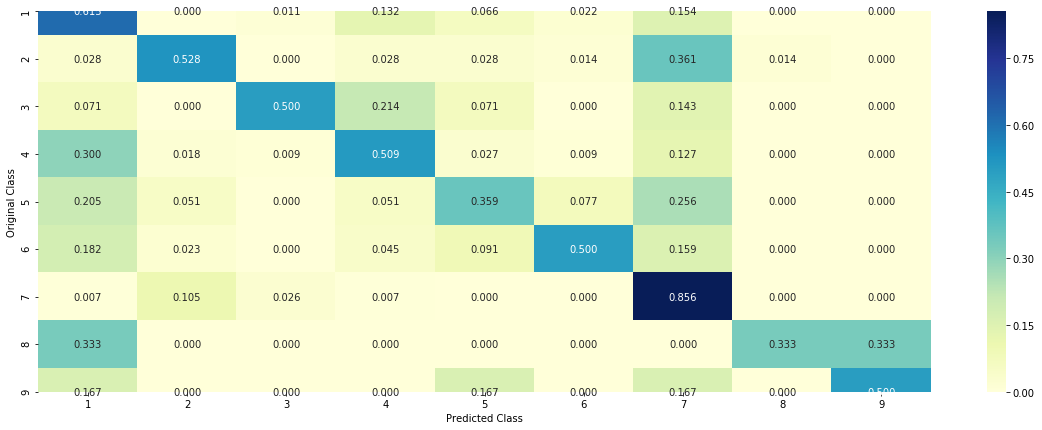

In [138]:
from sklearn.ensemble import VotingClassifier

vsclf = VotingClassifier(estimators=[('lr', sclf1), ('svc', sclf2), ('rf', sclf3)], voting='soft')

vsclf.fit(x_train_tfidf, y_train)

predict_y = vsclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y))

predict_y = vsclf.predict_proba(x_cv_tfidf)
print("train loss:",log_loss(y_cv, predict_y))

predict_y = vsclf.predict_proba(x_test_tfidf)
print("train loss:",log_loss(y_test, predict_y))


print("Number of missclassified point in cv data :", np.count_nonzero((vsclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((vsclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, vsclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_tfidf.add_row(['Voting Classifier',0.833,1.157,1.125,38.35]) 

<H1> models with top 1000 words of 'TEXT'

In [0]:
pt_1000_tfidf = PrettyTable()
pt_1000_tfidf.field_names = ['model', 'train loss','cv loss', 'test loss', '%misclassification']

In [0]:
tfidf_vect = TfidfVectorizer(min_df = 3) 
train_text_tfidf = tfidf_vect.fit_transform(train_df['TEXT'])

In [0]:
feature_name = np.array(tfidf_vect.get_feature_names())

In [0]:
idf = np.argsort(-tfidf_vect.idf_)[:1000] #top 1000 idf values stored

In [153]:
top_1000_words = feature_name[train_text_tfidf.indices[idf]]
top_1000_words.shape

(1000,)

In [0]:
tfidf_vect = TfidfVectorizer()

tfidf_vect.fit(top_1000_words)

train_text_tfidf = tfidf_vect.transform(train_df['TEXT'])
train_text_tfidf = normalize(train_text_tfidf,axis = 0)

cv_text_tfidf = tfidf_vect.transform(cv_df['TEXT'])
cv_text_tfidf = normalize(cv_text_tfidf,axis = 0)

test_text_tfidf = tfidf_vect.transform(test_df['TEXT'])
test_text_tfidf = normalize(test_text_tfidf,axis = 0) 

In [154]:
print(train_text_tfidf.shape)
print(cv_text_tfidf.shape)
print(test_text_tfidf.shape)

(2124, 933)
(532, 933)
(665, 933)


checking how important is this feature

For values of alpha =  1e-05 The log loss is: 1.2715166525560495
For values of alpha =  0.0001 The log loss is: 1.276448941058814
For values of alpha =  0.001 The log loss is: 1.5174327545018007
For values of alpha =  0.01 The log loss is: 1.8614733588684282
For values of alpha =  0.1 The log loss is: 2.112043547841781
For values of alpha =  1 The log loss is: 2.0832289077061685


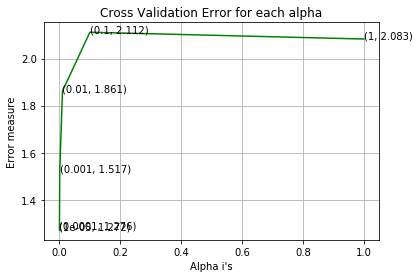

For values of best alpha =  1e-05 The train log loss is: 0.7322902571540196
For values of best alpha =  1e-05 The cross validation log loss is: 1.2715166525560495
For values of best alpha =  1e-05 The test log loss is: 1.178489641023948


In [155]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_tfidf, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_tfidf, y_train)
    predict_y = sig_clf.predict_proba(cv_text_tfidf)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_tfidf, y_train)

predict_y = sig_clf.predict_proba(train_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Combining features

In [0]:
x_train_tfidf = hstack((train_gene_feature_onehotCoding, train_variation_feature_onehotCoding, train_text_tfidf))
x_cv_tfidf = hstack((cv_gene_feature_onehotCoding, cv_variation_feature_onehotCoding, cv_text_tfidf))
x_test_tfidf = hstack((test_gene_feature_onehotCoding, test_variation_feature_onehotCoding, test_text_tfidf))

In [157]:
print(x_train_tfidf.shape)
print(x_cv_tfidf.shape)
print(x_test_tfidf.shape)

(2124, 3121)
(532, 3121)
(665, 3121)


Naive bayes

alpha: 1e-05
log loss: 1.2051275828066408
alpha: 0.0001
log loss: 1.1990297689373655
alpha: 0.001
log loss: 1.19160064689236
alpha: 0.1
log loss: 1.2083061021912282
alpha: 1
log loss: 1.312958663715041
alpha: 10
log loss: 1.4452122789044182
alpha: 100
log loss: 1.4356001495832267
alpha: 1000
log loss: 1.4366627810166634


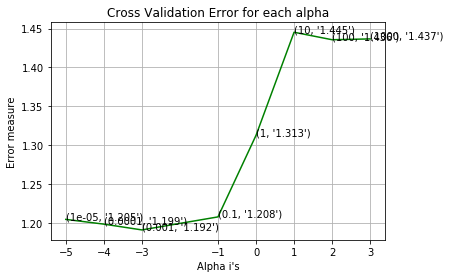

train loss: 0.5074607755143137
cv loss: 1.19160064689236
test loss: 1.1424305805571113
Number of missclassified point in cv data : 0.40037593984962405
Number of missclassified point in test data: 0.3744360902255639
-------------------- Confusion matrix --------------------


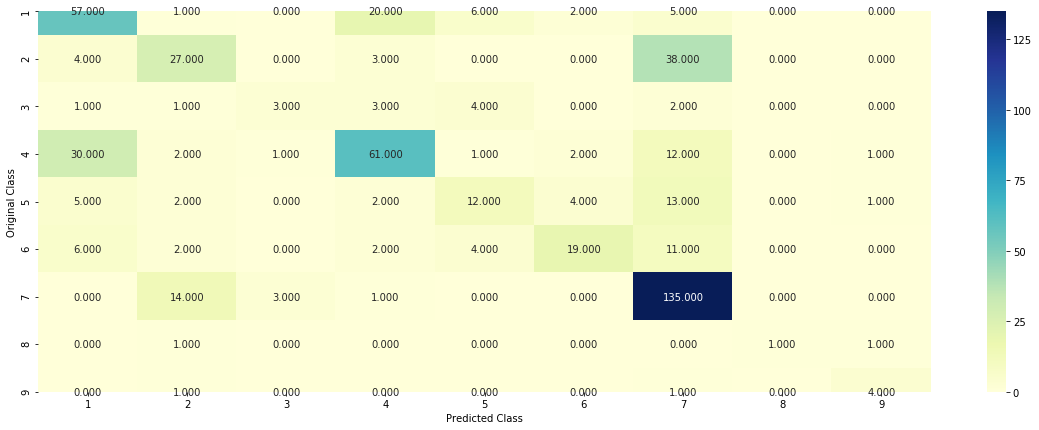

-------------------- Precision matrix (Columm Sum=1) --------------------


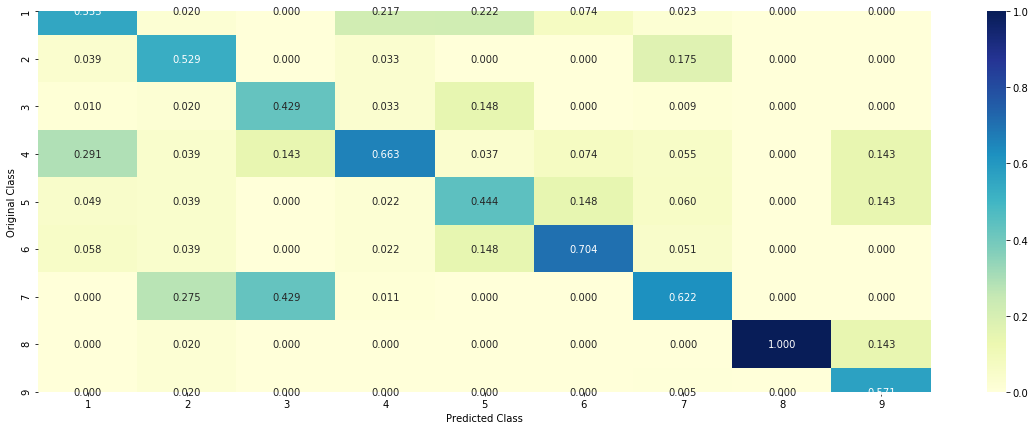

-------------------- Recall matrix (Row sum=1) --------------------


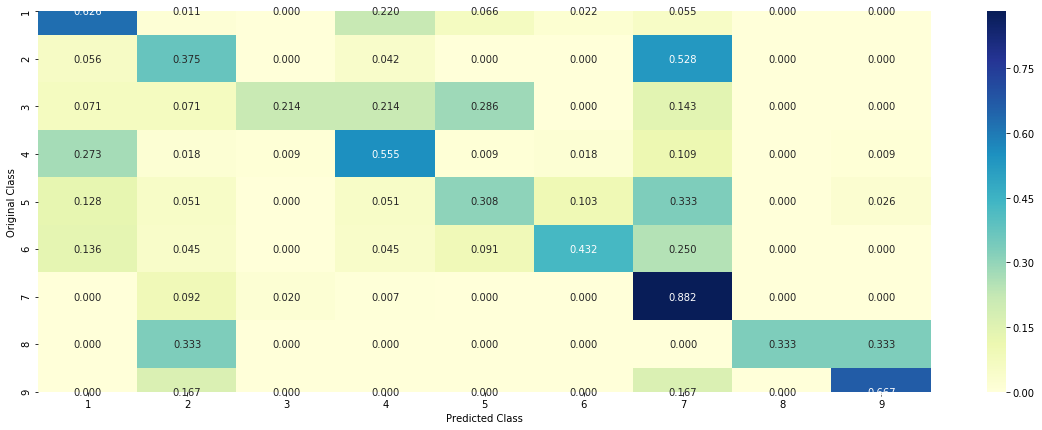

In [158]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []

for i in alpha:
  clf = MultinomialNB(alpha = i)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha = alpha[best_alpha])
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done


predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_1000_tfidf.add_row(['Naive Bayes',0.507,1.192,1.142,40.04]) 

KNN

alpha: 5
log loss: 1.100486725451609
alpha: 11
log loss: 1.1429223673783142
alpha: 15
log loss: 1.1702094589850964
alpha: 21
log loss: 1.1832464501686732
alpha: 31
log loss: 1.2060269786961848
alpha: 41
log loss: 1.2389644046620432
alpha: 51
log loss: 1.2602583007562915
alpha: 99
log loss: 1.2880630348937099


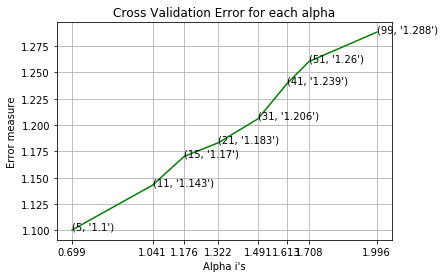

train loss: 0.8812629968481067
cv loss: 1.100486725451609
test loss: 1.120348418452643
Number of missclassified point in cv data : 0.3684210526315789
Number of missclassified point in test data: 0.36390977443609024
-------------------- Confusion matrix --------------------


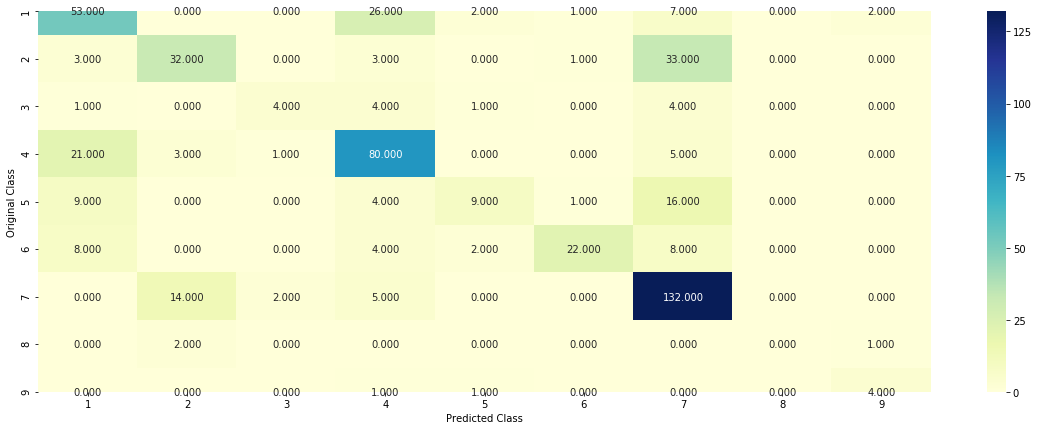

-------------------- Precision matrix (Columm Sum=1) --------------------


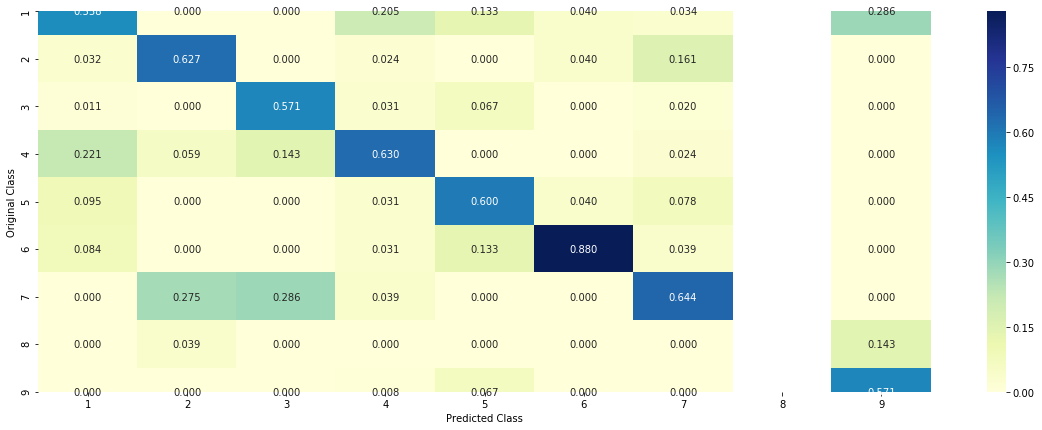

-------------------- Recall matrix (Row sum=1) --------------------


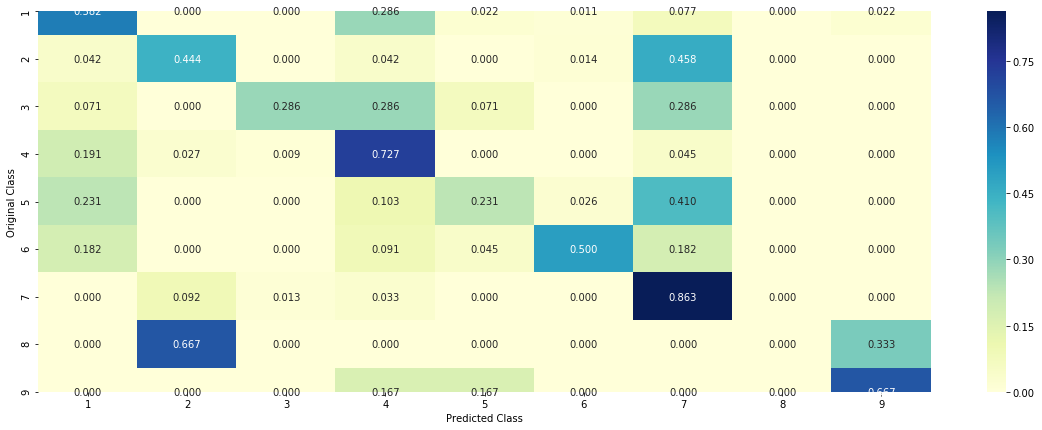

In [160]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []

for i in alpha:
  clf = KNeighborsClassifier(n_neighbors=i)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors = alpha[best_alpha])
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))


In [0]:
pt_1000_tfidf.add_row(['KNN',0.881,1.100,1.120,36.84]) 

LR with class balancing

alpha: 1e-06
log loss: 1.1871299229762355
alpha: 1e-05
log loss: 1.0905957267125757
alpha: 0.0001
log loss: 1.0279627087402199
alpha: 0.001
log loss: 1.0204440456268213
alpha: 0.01
log loss: 1.1721035037585668
alpha: 0.1
log loss: 1.3531551513848847
alpha: 1
log loss: 1.4656517860608762
alpha: 10
log loss: 1.4818483347976903
alpha: 100
log loss: 1.4837708571253836


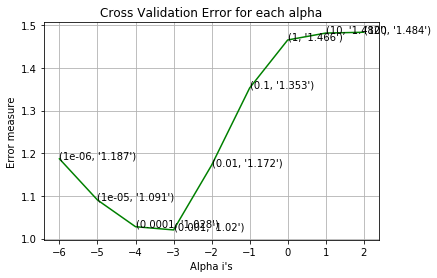

train loss: 0.7011835790746631
cv loss: 1.0204440456268213
test loss: 1.010199539286197
Number of missclassified point in cv data : 0.36466165413533835
Number of missclassified point in test data: 0.35037593984962406
-------------------- Confusion matrix --------------------


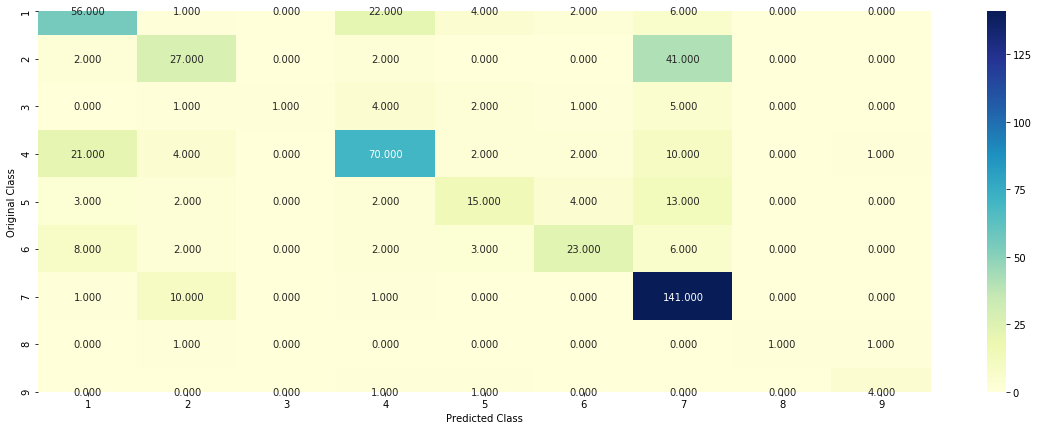

-------------------- Precision matrix (Columm Sum=1) --------------------


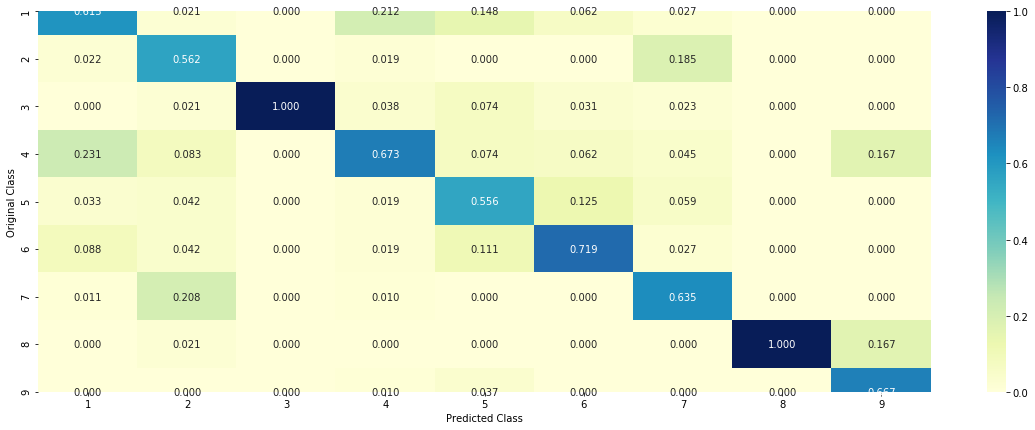

-------------------- Recall matrix (Row sum=1) --------------------


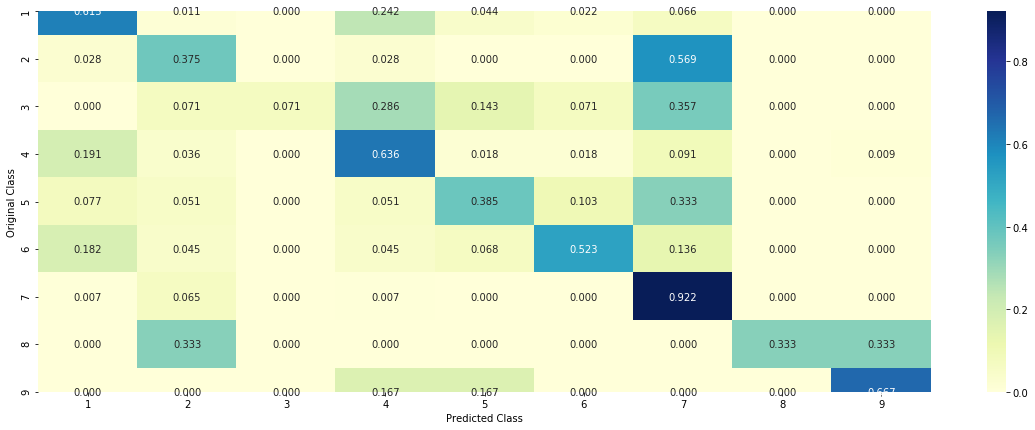

In [162]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='log',alpha = i,class_weight='balanced',penalty='l2', random_state=42)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='log',alpha = alpha[best_alpha],class_weight='balanced',penalty='l2', random_state=42)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_1000_tfidf.add_row(['LR with class balancing',0.701,1.020,1.010,36.47]) 

LR without class balancing

alpha: 1e-06
log loss: 1.1597454249038195
alpha: 1e-05
log loss: 1.1271077017333355
alpha: 0.0001
log loss: 1.0470197147329392
alpha: 0.001
log loss: 1.0992679906774454
alpha: 0.01
log loss: 1.2765579352075043
alpha: 0.1
log loss: 1.3394675620154683
alpha: 1
log loss: 1.478168230411905
alpha: 10
log loss: 1.504311133770306
alpha: 100
log loss: 1.5075860769056355


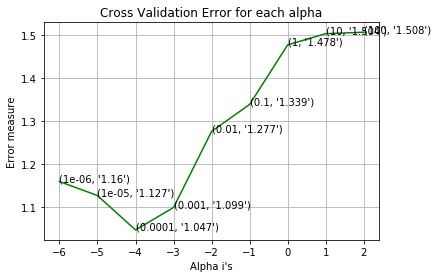

train loss: 0.41952388294368365
cv loss: 1.0470197147329392
test loss: 1.0001404386368218
Number of missclassified point in cv data : 0.35902255639097747
Number of missclassified point in test data: 0.33533834586466166
-------------------- Confusion matrix --------------------


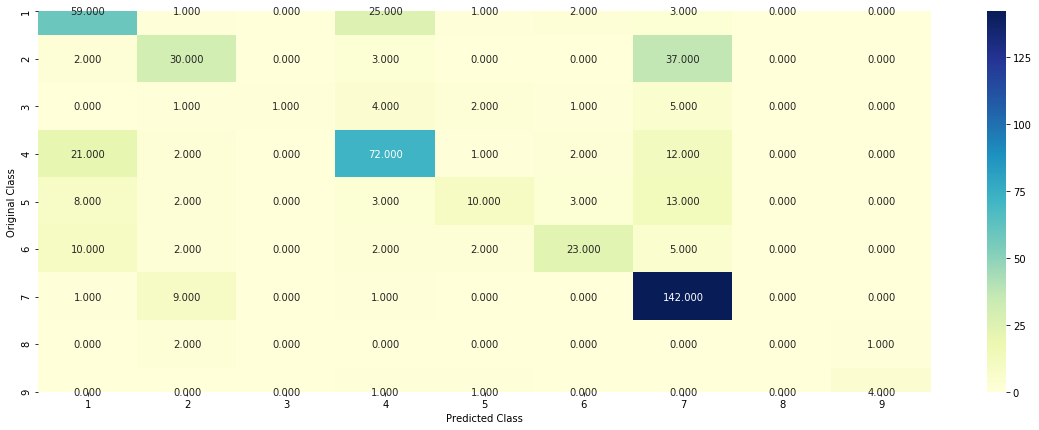

-------------------- Precision matrix (Columm Sum=1) --------------------


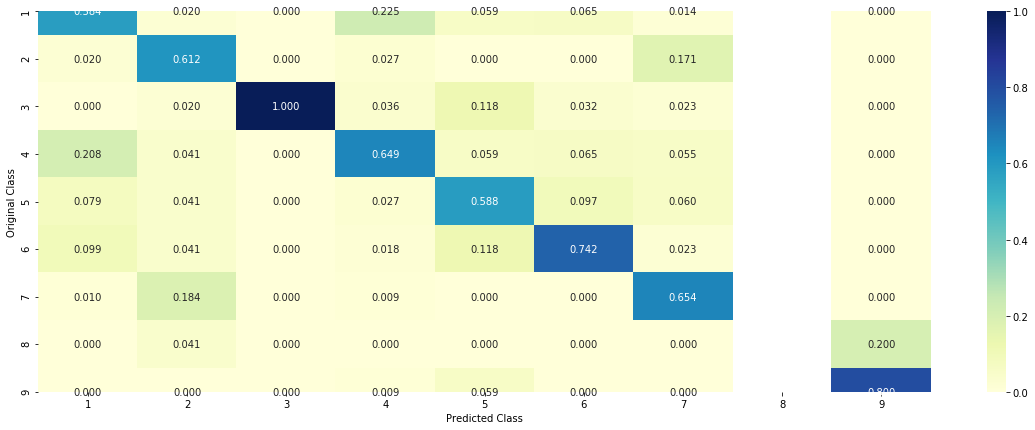

-------------------- Recall matrix (Row sum=1) --------------------


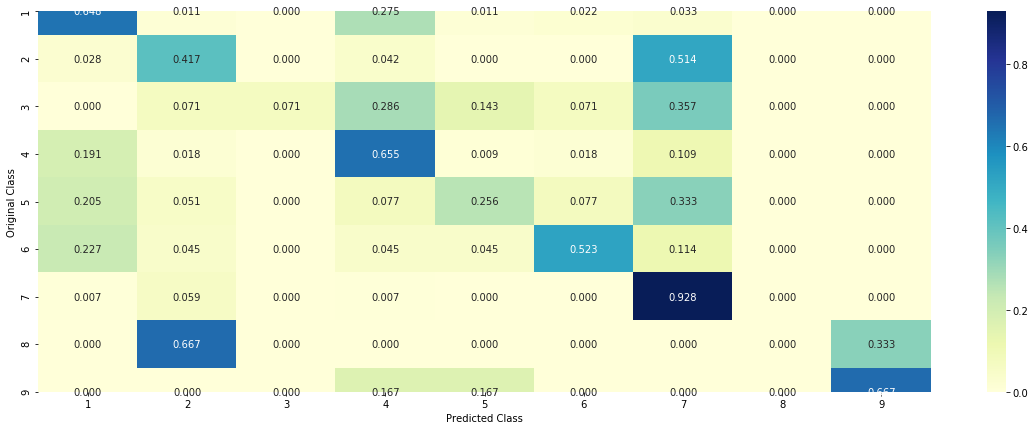

In [164]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='log',alpha = i,penalty='l2', random_state=42)
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='log',alpha = alpha[best_alpha],penalty='l2', random_state=42)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_1000_tfidf.add_row(['LR w/o class balance',0.420,1.047,1.000,35.90]) 

Linear SVM

alpha: 1e-05
log loss: 1.1302252979417413
alpha: 0.0001
log loss: 1.0727116464431512
alpha: 0.001
log loss: 1.0685863298417293
alpha: 0.01
log loss: 1.421934743522385
alpha: 0.1
log loss: 1.4070485060038749
alpha: 1
log loss: 1.4842220712347185
alpha: 10
log loss: 1.4842218650827594
alpha: 100
log loss: 1.4842218604346569


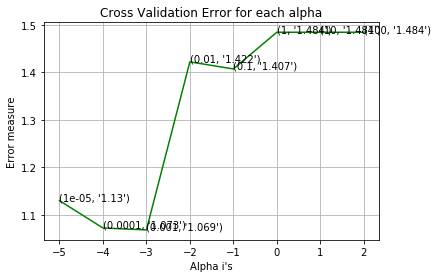

train loss: 0.5155701113521941
cv loss: 1.0685863298417293
test loss: 1.0562882914700389
Number of missclassified point in cv data : 0.36654135338345867
Number of missclassified point in test data: 0.33383458646616543
-------------------- Confusion matrix --------------------


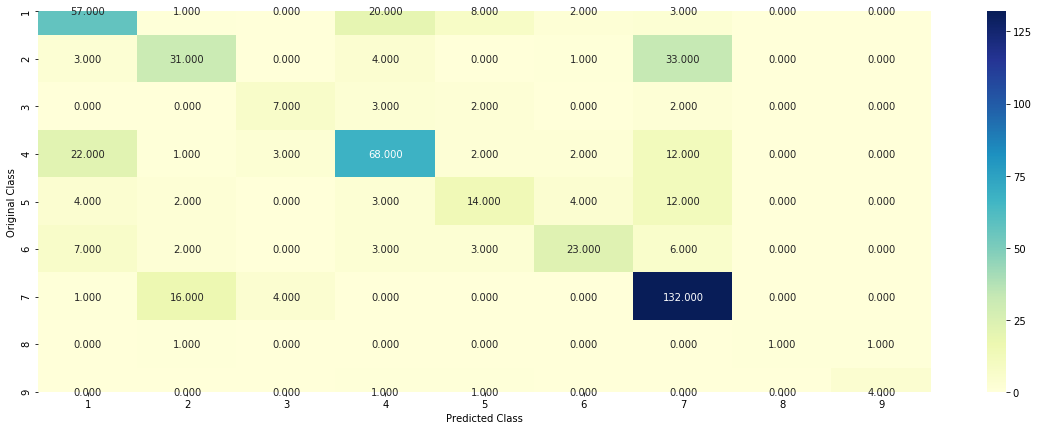

-------------------- Precision matrix (Columm Sum=1) --------------------


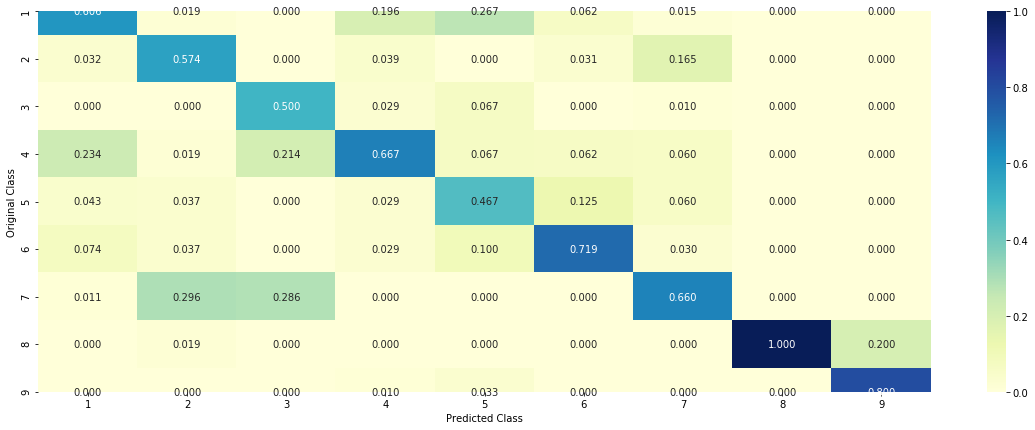

-------------------- Recall matrix (Row sum=1) --------------------


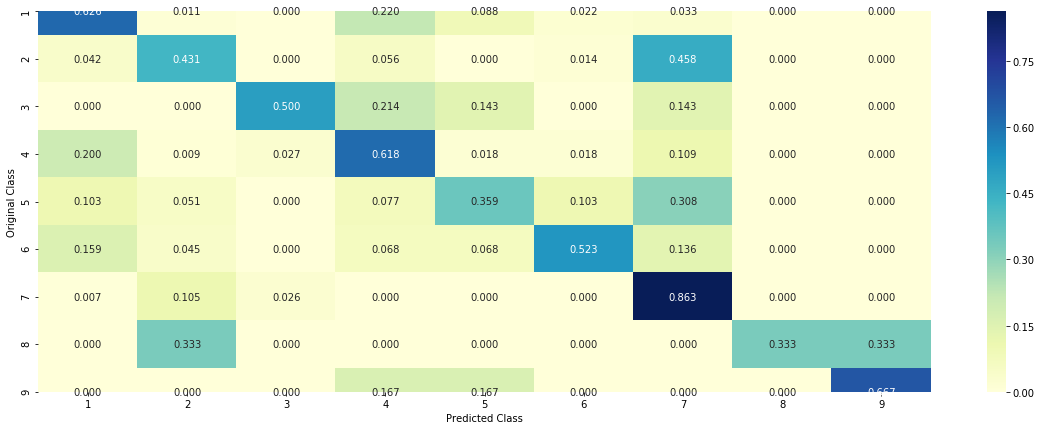

In [166]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='hinge',alpha = i,class_weight ='balanced',penalty='l2', random_state=42) #balanced because it proved to better results with LR
  print('alpha:',i)
  clf.fit(x_train_tfidf, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_tfidf, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_tfidf)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='hinge',alpha = alpha[best_alpha],penalty='l2',class_weight ='balanced',random_state=42)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_1000_tfidf.add_row(['Linear SVM',0.515,1.069,1.056,36.64]) 

Random Forest

for n_estimators = 100 and max depth =  5
log loss: 1.2829202837254243
for n_estimators = 100 and max depth =  10
log loss: 1.3007587476421585
for n_estimators = 200 and max depth =  5
log loss: 1.2613905297810752
for n_estimators = 200 and max depth =  10
log loss: 1.2768429607352232
for n_estimators = 500 and max depth =  5
log loss: 1.2455956080916175
for n_estimators = 500 and max depth =  10
log loss: 1.2673677548298503
for n_estimators = 1000 and max depth =  5
log loss: 1.2423583637057487
for n_estimators = 1000 and max depth =  10
log loss: 1.2638097746589105
for n_estimators = 2000 and max depth =  5
log loss: 1.2406662527179086
for n_estimators = 2000 and max depth =  10
log loss: 1.261232413493219


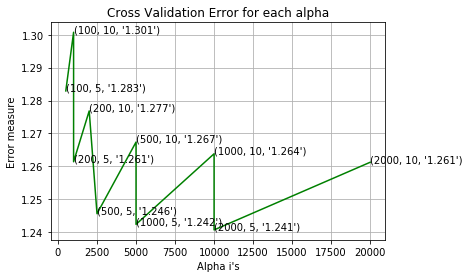

In [168]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]

cv_log_error_array = []

for i in alpha:
  for j in max_depth:
    clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1) 
    print("for n_estimators =", i,"and max depth = ", j)
    clf.fit(x_train_tfidf, y_train)
    sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
    sclf.fit(x_train_tfidf, y_train) #fit done

    y_predict = sclf.predict_proba(x_cv_tfidf)
    cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
    print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

train loss: 0.86285686804855
cv loss: 1.2406662525233412
test loss: 1.1990436175721657
Number of missclassified point in cv data : 0.4342105263157895
Number of missclassified point in test data: 0.40902255639097745
-------------------- Confusion matrix --------------------


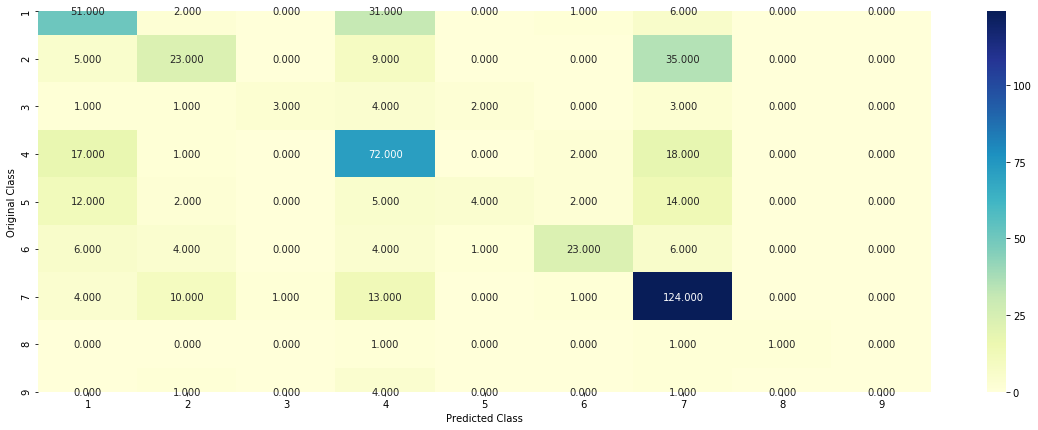

-------------------- Precision matrix (Columm Sum=1) --------------------


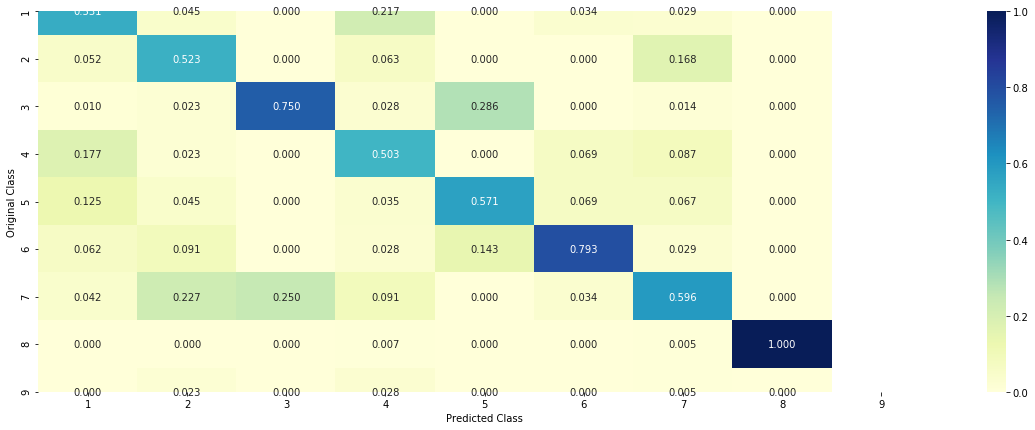

-------------------- Recall matrix (Row sum=1) --------------------


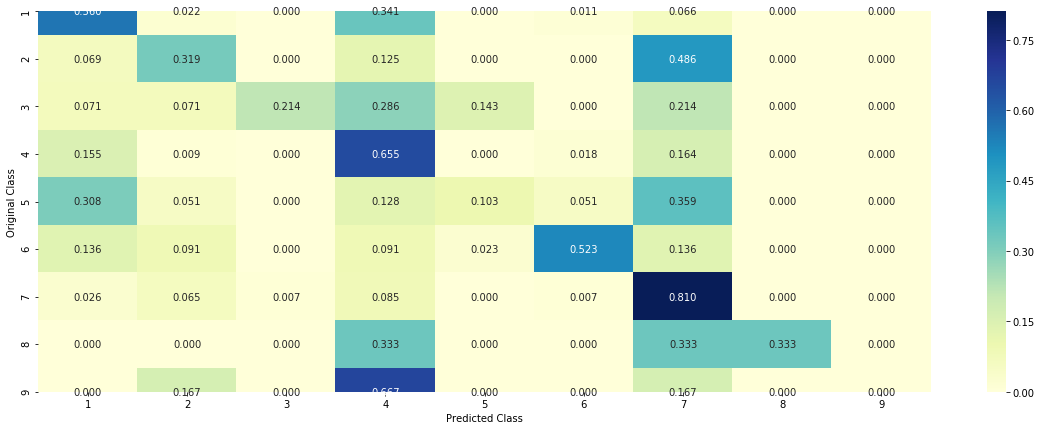

In [169]:
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(x_train_tfidf, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_tfidf, y_train) #fit done

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_tfidf)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_1000_tfidf.add_row(['RF',0.862,1.24,1.2,43.4]) 

Stacking Classifier

In [171]:
cv_log_error_array = []

clf1 = MultinomialNB(alpha = 0.001) #NB
clf1.fit(x_train_tfidf, y_train)
sclf1 = CalibratedClassifierCV(clf1, method= 'sigmoid')

clf2 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0) #LR
clf2.fit(x_train_tfidf, y_train)
sclf2 = CalibratedClassifierCV(clf2, method= 'sigmoid')

clf3 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0) #SVM
clf3.fit(x_train_tfidf, y_train)
sclf3 = CalibratedClassifierCV(clf3, method= 'sigmoid')


alpha = [0.0001,0.001,0.01,0.1,1,10] 
for i in alpha:
  clf = SGDClassifier(alpha = i, loss='log',class_weight = 'balanced') #LR
  sclf = StackingClassifier(classifiers= [sclf1,sclf2,sclf3], meta_classifier= clf, use_probas=True)
  sclf.fit(x_train_tfidf, y_train)

  cv_log_error_array.append(log_loss(y_cv, sclf.predict_proba(x_cv_tfidf)))
  print('log loss:', log_loss(y_cv, sclf.predict_proba(x_cv_tfidf)))


log loss: 1.7200403021521116
log loss: 1.2758471173646349
log loss: 1.2470272511325022
log loss: 1.8124559890712941
log loss: 2.0763719705658286
log loss: 2.1477472264503135


train loss: 0.7481927912367042
train loss: 1.2392660238090019
train loss: 1.2096571746581846
Number of missclassified point in cv data : 0.37030075187969924
Number of missclassified point in test data: 0.3458646616541353
-------------------- Confusion matrix --------------------


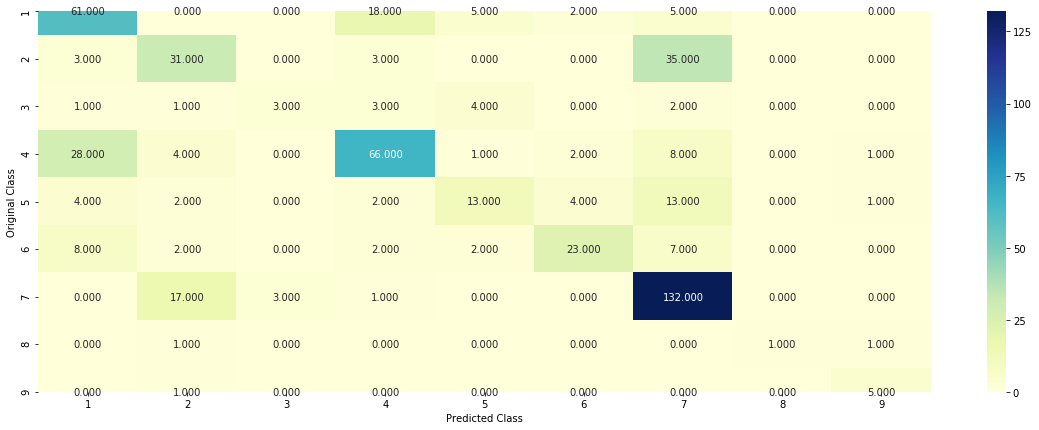

-------------------- Precision matrix (Columm Sum=1) --------------------


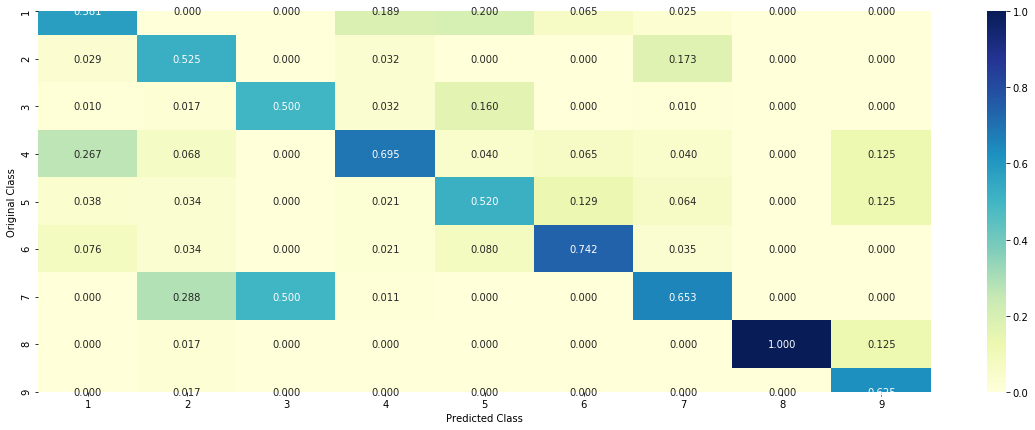

-------------------- Recall matrix (Row sum=1) --------------------


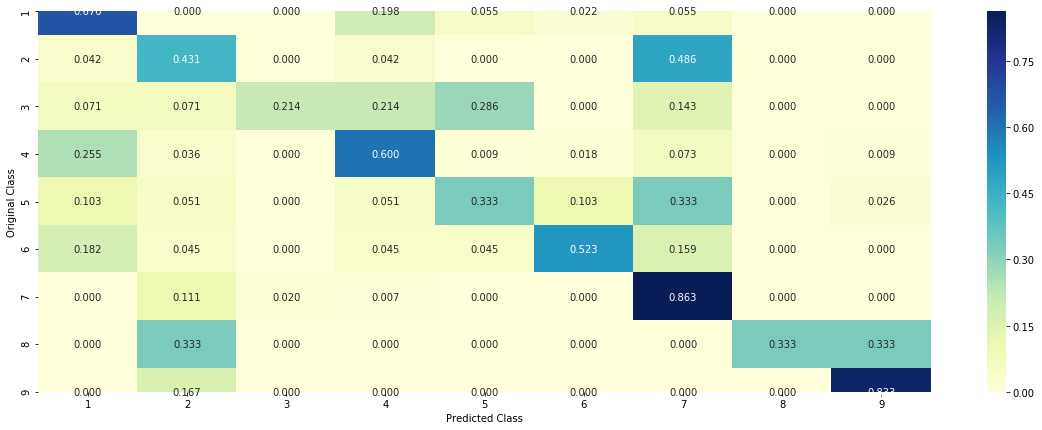

In [172]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha = alpha[best_alpha], loss='log',class_weight = 'balanced')
sclf = StackingClassifier(classifiers= [sclf1,sclf2,sclf3], meta_classifier= clf, use_probas=True)
sclf.fit(x_train_tfidf, y_train)

predict_y = sclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y))

predict_y = sclf.predict_proba(x_cv_tfidf)
print("train loss:",log_loss(y_cv, predict_y))

predict_y = sclf.predict_proba(x_test_tfidf)
print("train loss:",log_loss(y_test, predict_y))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_1000_tfidf.add_row(['Stacking Classifier',0.745,1.24,1.21,37.03]) 

Voting Classifier

train loss: 0.7773823689853608
train loss: 1.141892769428899
train loss: 1.126380016663819
Number of missclassified point in cv data : 0.37593984962406013
Number of missclassified point in test data: 0.37293233082706767
-------------------- Confusion matrix --------------------


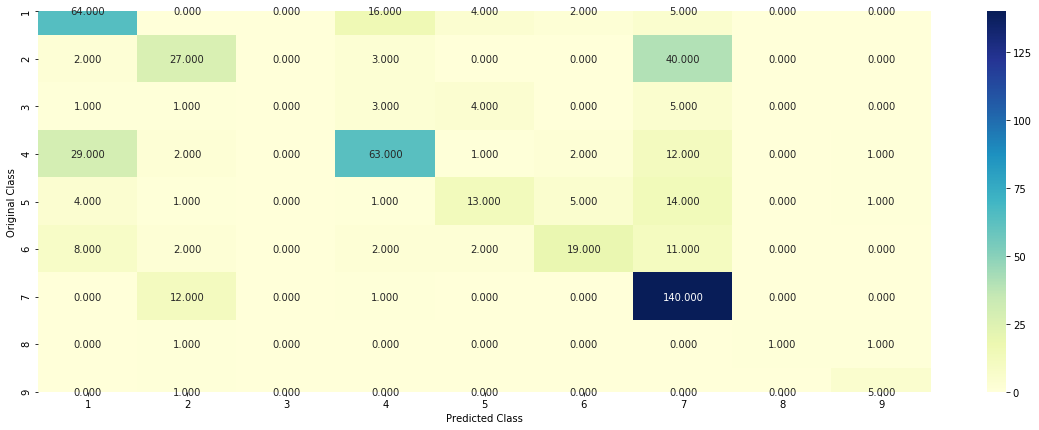

-------------------- Precision matrix (Columm Sum=1) --------------------


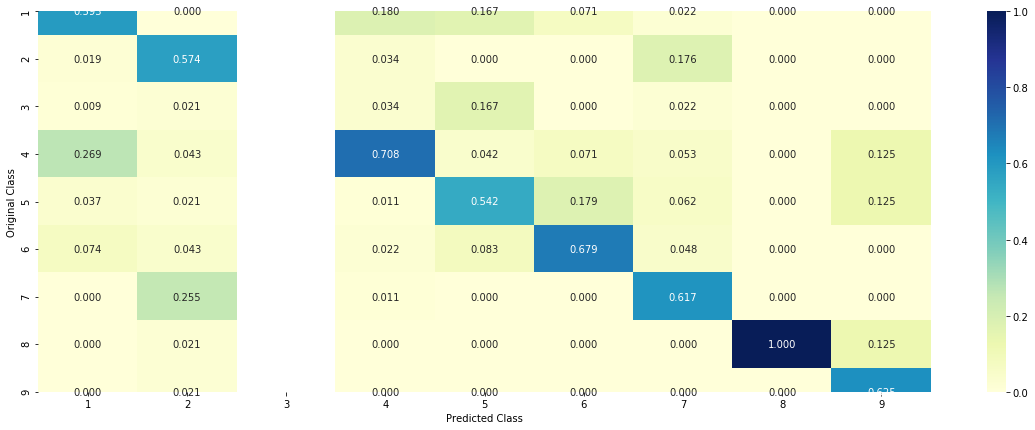

-------------------- Recall matrix (Row sum=1) --------------------


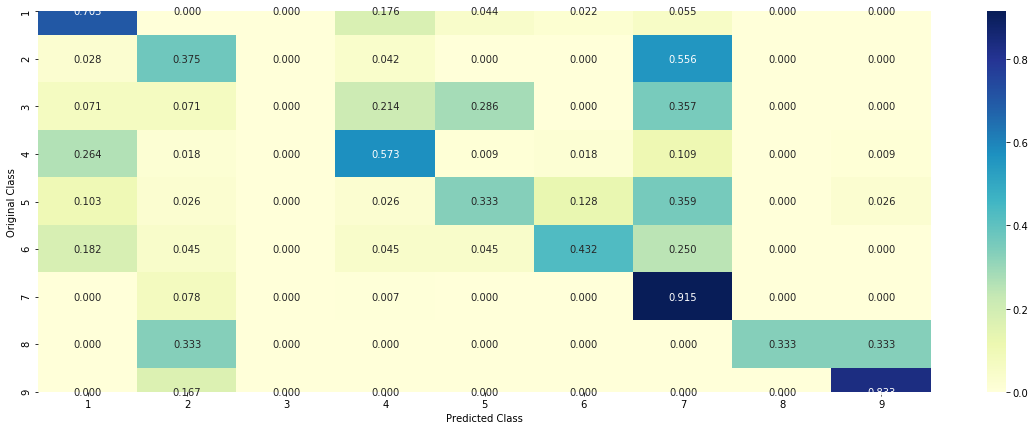

In [174]:
from sklearn.ensemble import VotingClassifier

vsclf = VotingClassifier(estimators=[('lr', sclf1), ('svc', sclf2), ('rf', sclf3)], voting='soft')

vsclf.fit(x_train_tfidf, y_train)

predict_y = vsclf.predict_proba(x_train_tfidf)
print("train loss:",log_loss(y_train, predict_y))

predict_y = vsclf.predict_proba(x_cv_tfidf)
print("train loss:",log_loss(y_cv, predict_y))

predict_y = vsclf.predict_proba(x_test_tfidf)
print("train loss:",log_loss(y_test, predict_y))


print("Number of missclassified point in cv data :", np.count_nonzero((vsclf.predict(x_cv_tfidf)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((vsclf.predict(x_test_tfidf)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, vsclf.predict(x_cv_tfidf.toarray()))

In [0]:
pt_1000_tfidf.add_row(['Voting Classifier',0.777,1.14,1.126,37.59]) 

<h1>Applying Logistic regression with CountVectorizer Features, including both unigrams and bigrams

In [0]:
count_vect =  CountVectorizer(ngram_range=(1,2)) #considering uni gram and bi gram

train_text_onehot = count_vect.fit_transform(train_df['TEXT'])
train_text_onehot = normalize(train_text_onehot,axis = 0)

cv_text_onehot = count_vect.transform(cv_df['TEXT'])
cv_text_onehot = normalize(cv_text_onehot,axis = 0)

test_text_onehot = count_vect.transform(test_df['TEXT'])
test_text_onehot = normalize(test_text_onehot,axis = 0) 

In [179]:
print(train_text_onehot.shape)
print(cv_text_onehot.shape)
print(test_text_onehot.shape)

(2124, 2358144)
(532, 2358144)
(665, 2358144)


checking how useful is this feature

For values of alpha =  1e-05 The log loss is: 1.5281082733269544
For values of alpha =  0.0001 The log loss is: 1.4792960867620508
For values of alpha =  0.001 The log loss is: 1.3081780785656234
For values of alpha =  0.01 The log loss is: 1.2775295587566264
For values of alpha =  0.1 The log loss is: 1.325748294934889
For values of alpha =  1 The log loss is: 1.3649011063490584


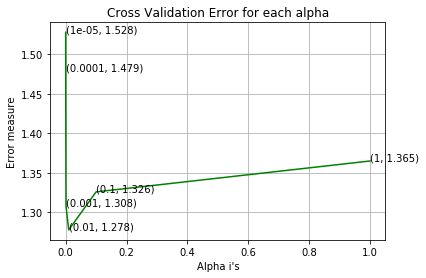

For values of best alpha =  0.01 The train log loss is: 0.6172661287018613
For values of best alpha =  0.01 The cross validation log loss is: 1.2775295587566264
For values of best alpha =  0.01 The test log loss is: 1.203642091632234


In [180]:
# Train a Logistic regression+Calibration model using text features whicha re one-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_onehot, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_onehot, y_train)
    predict_y = sig_clf.predict_proba(cv_text_onehot)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_onehot, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_onehot, y_train)

predict_y = sig_clf.predict_proba(train_text_onehot) 
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_onehot)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_onehot)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


This looks fine too

Combining features

In [181]:
x_train_onehot = hstack((train_gene_feature_onehotCoding, train_variation_feature_onehotCoding, train_text_onehot))
x_cv_onehot = hstack((cv_gene_feature_onehotCoding, cv_variation_feature_onehotCoding, cv_text_onehot))
x_test_onehot = hstack((test_gene_feature_onehotCoding, test_variation_feature_onehotCoding, test_text_onehot))

print(x_train_onehot.shape)
print(x_cv_onehot.shape)
print(x_test_onehot.shape)

(2124, 2360332)
(532, 2360332)
(665, 2360332)


LR with class balancing

alpha: 1e-06
log loss: 1.6004306201728709
alpha: 1e-05
log loss: 1.5752434825571142
alpha: 0.0001
log loss: 1.5215311811089423
alpha: 0.001
log loss: 1.2741574082010039
alpha: 0.01
log loss: 1.263205640435595
alpha: 0.1
log loss: 1.2801274325881826
alpha: 1
log loss: 1.3231429405282198
alpha: 10
log loss: 1.3742268710892096
alpha: 100
log loss: 1.392424721678095


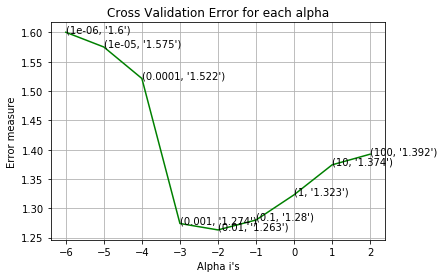

train loss: 0.6030368517311683
cv loss: 1.263205640435595
test loss: 1.1903381630999876
Number of missclassified point in cv data : 0.41541353383458646
Number of missclassified point in test data: 0.38646616541353385


In [0]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='log',alpha = i,class_weight='balanced',penalty='l2', random_state=42)
  print('alpha:',i)
  clf.fit(x_train_onehot, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_onehot, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_onehot)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='log',alpha = alpha[best_alpha],class_weight='balanced',penalty='l2', random_state=42)
clf.fit(x_train_onehot, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_onehot, y_train) #fit done

predict_y = sclf.predict_proba(x_train_onehot)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_onehot)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_onehot)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_onehot)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_onehot)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_onehot.toarray()))

<h1>Feature Engineering

Gene and variation  features are categorical data and we already did onehotencoding on them. Therefore we can apply FE on text features.

Here i try to vectorize the text features of train,cv and text with pre-trained glove vectors.

In [103]:
from tqdm import tqdm
#loading glove vectors

from numpy import asarray

# load the whole embedding into memory
embeddings_index = dict() #every word along with its weight stored

path_glove = '/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt'
f = open(path_glove)
for line in f:
	values = line.split()
	word = values[0] #stores the word whose weights have been stored
	coefs = asarray(values[1:], dtype='float32') # coefs store the 100d weight of the word
	embeddings_index[word] = coefs 
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [104]:
glove_words = embeddings_index.keys()

avg_w2v_vectors_text_train = []

for sent in tqdm(train_df['TEXT']):
  vector = np.zeros(100)
  count_words = 0
  for word in sent.split():
    if word in glove_words:
      vector+=embeddings_index[word]
      count_words+=1
  if count_words != 0:
    vector /= count_words
  avg_w2v_vectors_text_train.append(vector)



100%|██████████| 2124/2124 [00:30<00:00, 69.81it/s]


In [105]:
avg_w2v_vectors_text_cv = []

for sent in tqdm(cv_df['TEXT']):
  vector = np.zeros(100)
  count_words = 0
  for word in sent.split():
    if word in glove_words:
      vector+=embeddings_index[word]
      count_words+=1
  if count_words != 0:
    vector /= count_words
  avg_w2v_vectors_text_cv.append(vector)

100%|██████████| 532/532 [00:07<00:00, 71.65it/s]


In [106]:
avg_w2v_vectors_text_test = []

for sent in tqdm(test_df['TEXT']):
  vector = np.zeros(100)
  count_words = 0
  for word in sent.split():
    if word in glove_words:
      vector+=embeddings_index[word]
      count_words+=1
  if count_words != 0:
    vector /= count_words
  avg_w2v_vectors_text_test.append(vector)

100%|██████████| 665/665 [00:09<00:00, 69.14it/s]


In [0]:
x_train_w2v = hstack((train_gene_feature_onehotCoding, train_variation_feature_onehotCoding, avg_w2v_vectors_text_train))
x_cv_w2v = hstack((cv_gene_feature_onehotCoding, cv_variation_feature_onehotCoding, avg_w2v_vectors_text_cv))
x_test_w2v = hstack((test_gene_feature_onehotCoding, test_variation_feature_onehotCoding, avg_w2v_vectors_text_test))

In [108]:
print(x_train_w2v.shape)
print(x_cv_w2v.shape)
print(x_test_w2v.shape)

(2124, 2290)
(532, 2290)
(665, 2290)


alpha: 1e-06
log loss: 1.0943646151883408
alpha: 1e-05
log loss: 1.0866433369380641
alpha: 0.0001
log loss: 1.0638477113491467
alpha: 0.001
log loss: 1.102433793250089
alpha: 0.01
log loss: 1.2282632440162837
alpha: 0.1
log loss: 1.6186311463728937
alpha: 1
log loss: 1.7908986341190525
alpha: 10
log loss: 1.7923867078949764
alpha: 100
log loss: 1.7922476447376663


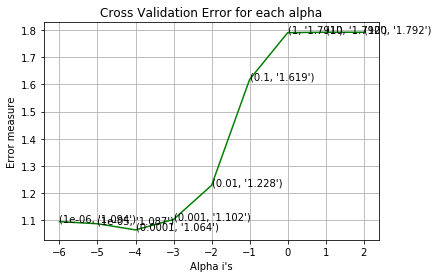

train loss: 0.536210845961949
cv loss: 1.0638477113491467
test loss: 1.0824178865123222
Number of missclassified point in cv data : 0.38345864661654133
Number of missclassified point in test data: 0.3774436090225564
-------------------- Confusion matrix --------------------


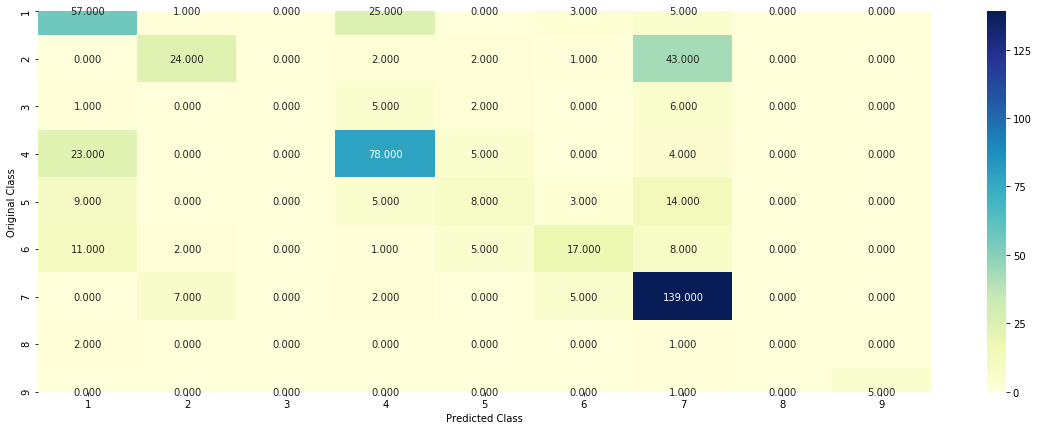

-------------------- Precision matrix (Columm Sum=1) --------------------


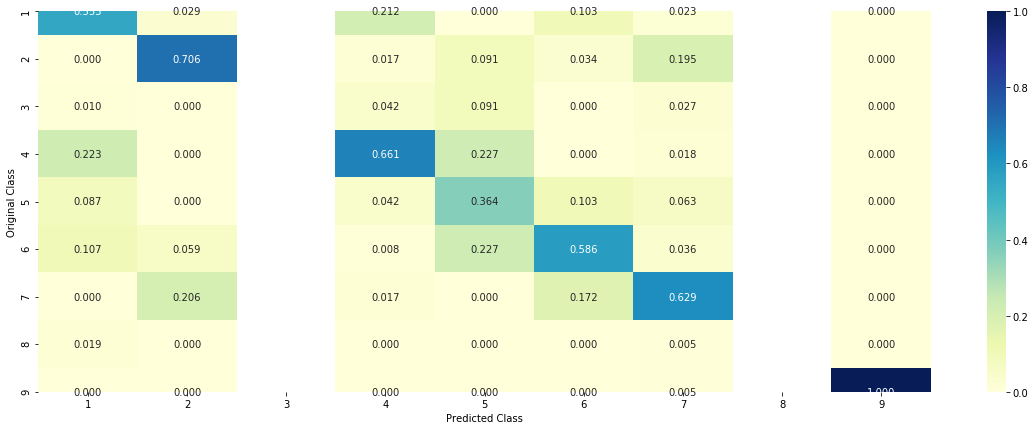

-------------------- Recall matrix (Row sum=1) --------------------


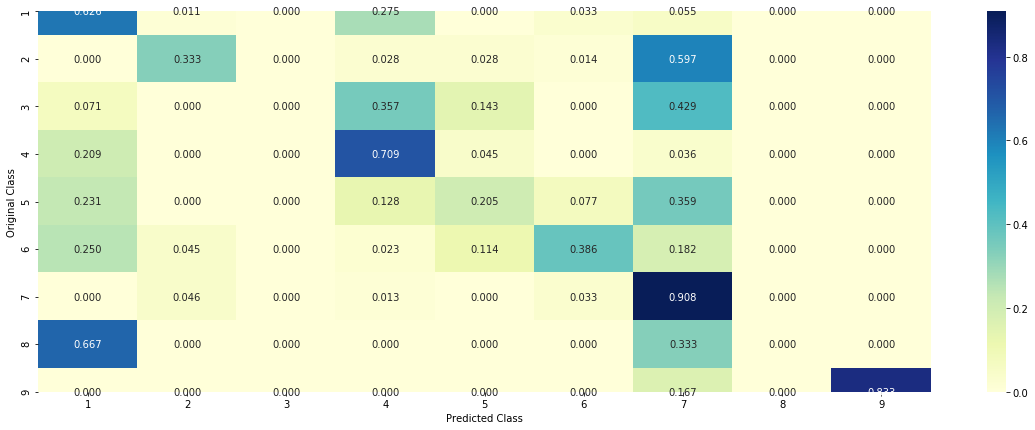

In [109]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []

for i in alpha:
  clf = SGDClassifier(loss='log',alpha = i,class_weight='balanced', random_state=42)
  print('alpha:',i)
  clf.fit(x_train_w2v, y_train)
  sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
  sclf.fit(x_train_w2v, y_train) #fit done

  y_predict = sclf.predict_proba(x_cv_w2v)
  cv_log_error_array.append(log_loss(y_cv, y_predict, labels = clf.classes_, eps=1e-15))
  print('log loss:',log_loss(y_cv, y_predict))

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(loss='log',alpha = alpha[best_alpha],class_weight='balanced',penalty='l2', random_state=42)
clf.fit(x_train_w2v, y_train)
sclf = CalibratedClassifierCV(clf, method = 'sigmoid')
sclf.fit(x_train_w2v, y_train) #fit done

predict_y = sclf.predict_proba(x_train_w2v)
print("train loss:",log_loss(y_train, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_cv_w2v)
print("cv loss:",log_loss(y_cv, predict_y, labels = clf.classes_, eps= 1e-15))

predict_y = sclf.predict_proba(x_test_w2v)
print("test loss:",log_loss(y_test, predict_y, labels = clf.classes_, eps= 1e-15))


print("Number of missclassified point in cv data :", np.count_nonzero((sclf.predict(x_cv_w2v)- y_cv))/y_cv.shape[0])
print("Number of missclassified point in test data:", np.count_nonzero((sclf.predict(x_test_w2v)- y_test))/y_test.shape[0])

plot_confusion_matrix(y_cv, sclf.predict(x_cv_w2v.toarray()))

Not much improvement was seen after applying w2v

<h1> Summary

In [177]:
print("Data with onehotCoded and random coded vectors")
print(x)
print("Data where 'text' features were Tfidf vectors")
print(pt_tfidf)
print("Data where 'text' features were Tfidf vectors(top 1000 words)")
print(pt_1000_tfidf)

Data with onehotCoded and random coded vectors
+----------------------------------------+------------+---------+-----------+--------------------+
|                 model                  | train loss | cv loss | test loss | %misclassification |
+----------------------------------------+------------+---------+-----------+--------------------+
|              Naive Bayes               |   0.822    |  1.298  |   1.265   |       41.16        |
|                  K-NN                  |   0.628    |   1.08  |   1.054   |       38.53        |
| Logistic Regression with class balance |   0.559    |  1.163  |   1.071   |       36.28        |
| Logistic Regression w/o class balance  |   0.562    |  1.185  |   1.088   |       34.96        |
|                  SVM                   |    0.74    |  1.181  |   1.114   |       36.65        |
|              RF with OHE               |   0.682    |  1.209  |   1.183   |       41.35        |
|               RF with RC               |    0.05    |  1.299

In [110]:
print("Results after considering unigram and bigram for LR model")
print("train loss: 0.6030368517311683")
print("cv loss: 1.263205640435595")
print("test loss: 1.1903381630999876")
print("Number of missclassified point in cv data : 0.41541353383458646")

Results after considering unigram and bigram for LR model
train loss: 0.6030368517311683
cv loss: 1.263205640435595
test loss: 1.1903381630999876
Number of missclassified point in cv data : 0.41541353383458646


In [111]:
print("Applying LR on w2v text featurs, result was-")
print("train loss: 0.536210845961949")
print("cv loss: 1.0638477113491467")
print("test loss: 1.0824178865123222")
print("Number of missclassified point in cv data : 0.38345864661654133")

Applying LR on w2v text featurs, result was-
train loss: 0.536210845961949
cv loss: 1.0638477113491467
test loss: 1.0824178865123222
Number of missclassified point in cv data : 0.38345864661654133


<H1>Steps-

1. There were 3 features- gene, variation and text and class label.
   So onehot encoding and random coding was done on all 3 features and combined    using htack to form data.
2. This data was used to train different models - Naive Bayes, Log. Regression,    SVM, RF, Stacking Classifier, Voting Classifier. Class weight was also considered and LR models were trained using both balanced and imbalanced dataset individually.
3. All the models were build again with 2 diff times of text features-
  1. tfidf vectors
  2. top 1000 words, find using idf_ values of the tfidf vector 
4. LR model was again build considering both unigram and bigram of Text feature
5. For all model train,cv and test loss was noted and at last it was found that Logistic Regression gave best results i.e. min test loss and min misclassified points when top 1000 words was considered after training the tfidf vectorizer on
x_train text data